## Current Source Circuit
### Q1: For each waveform determine the peaks and average
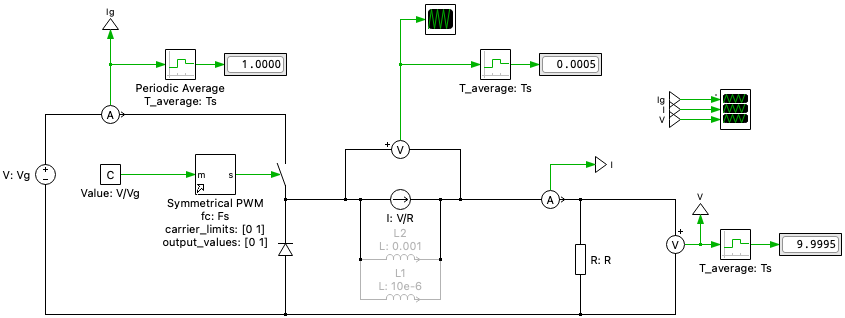
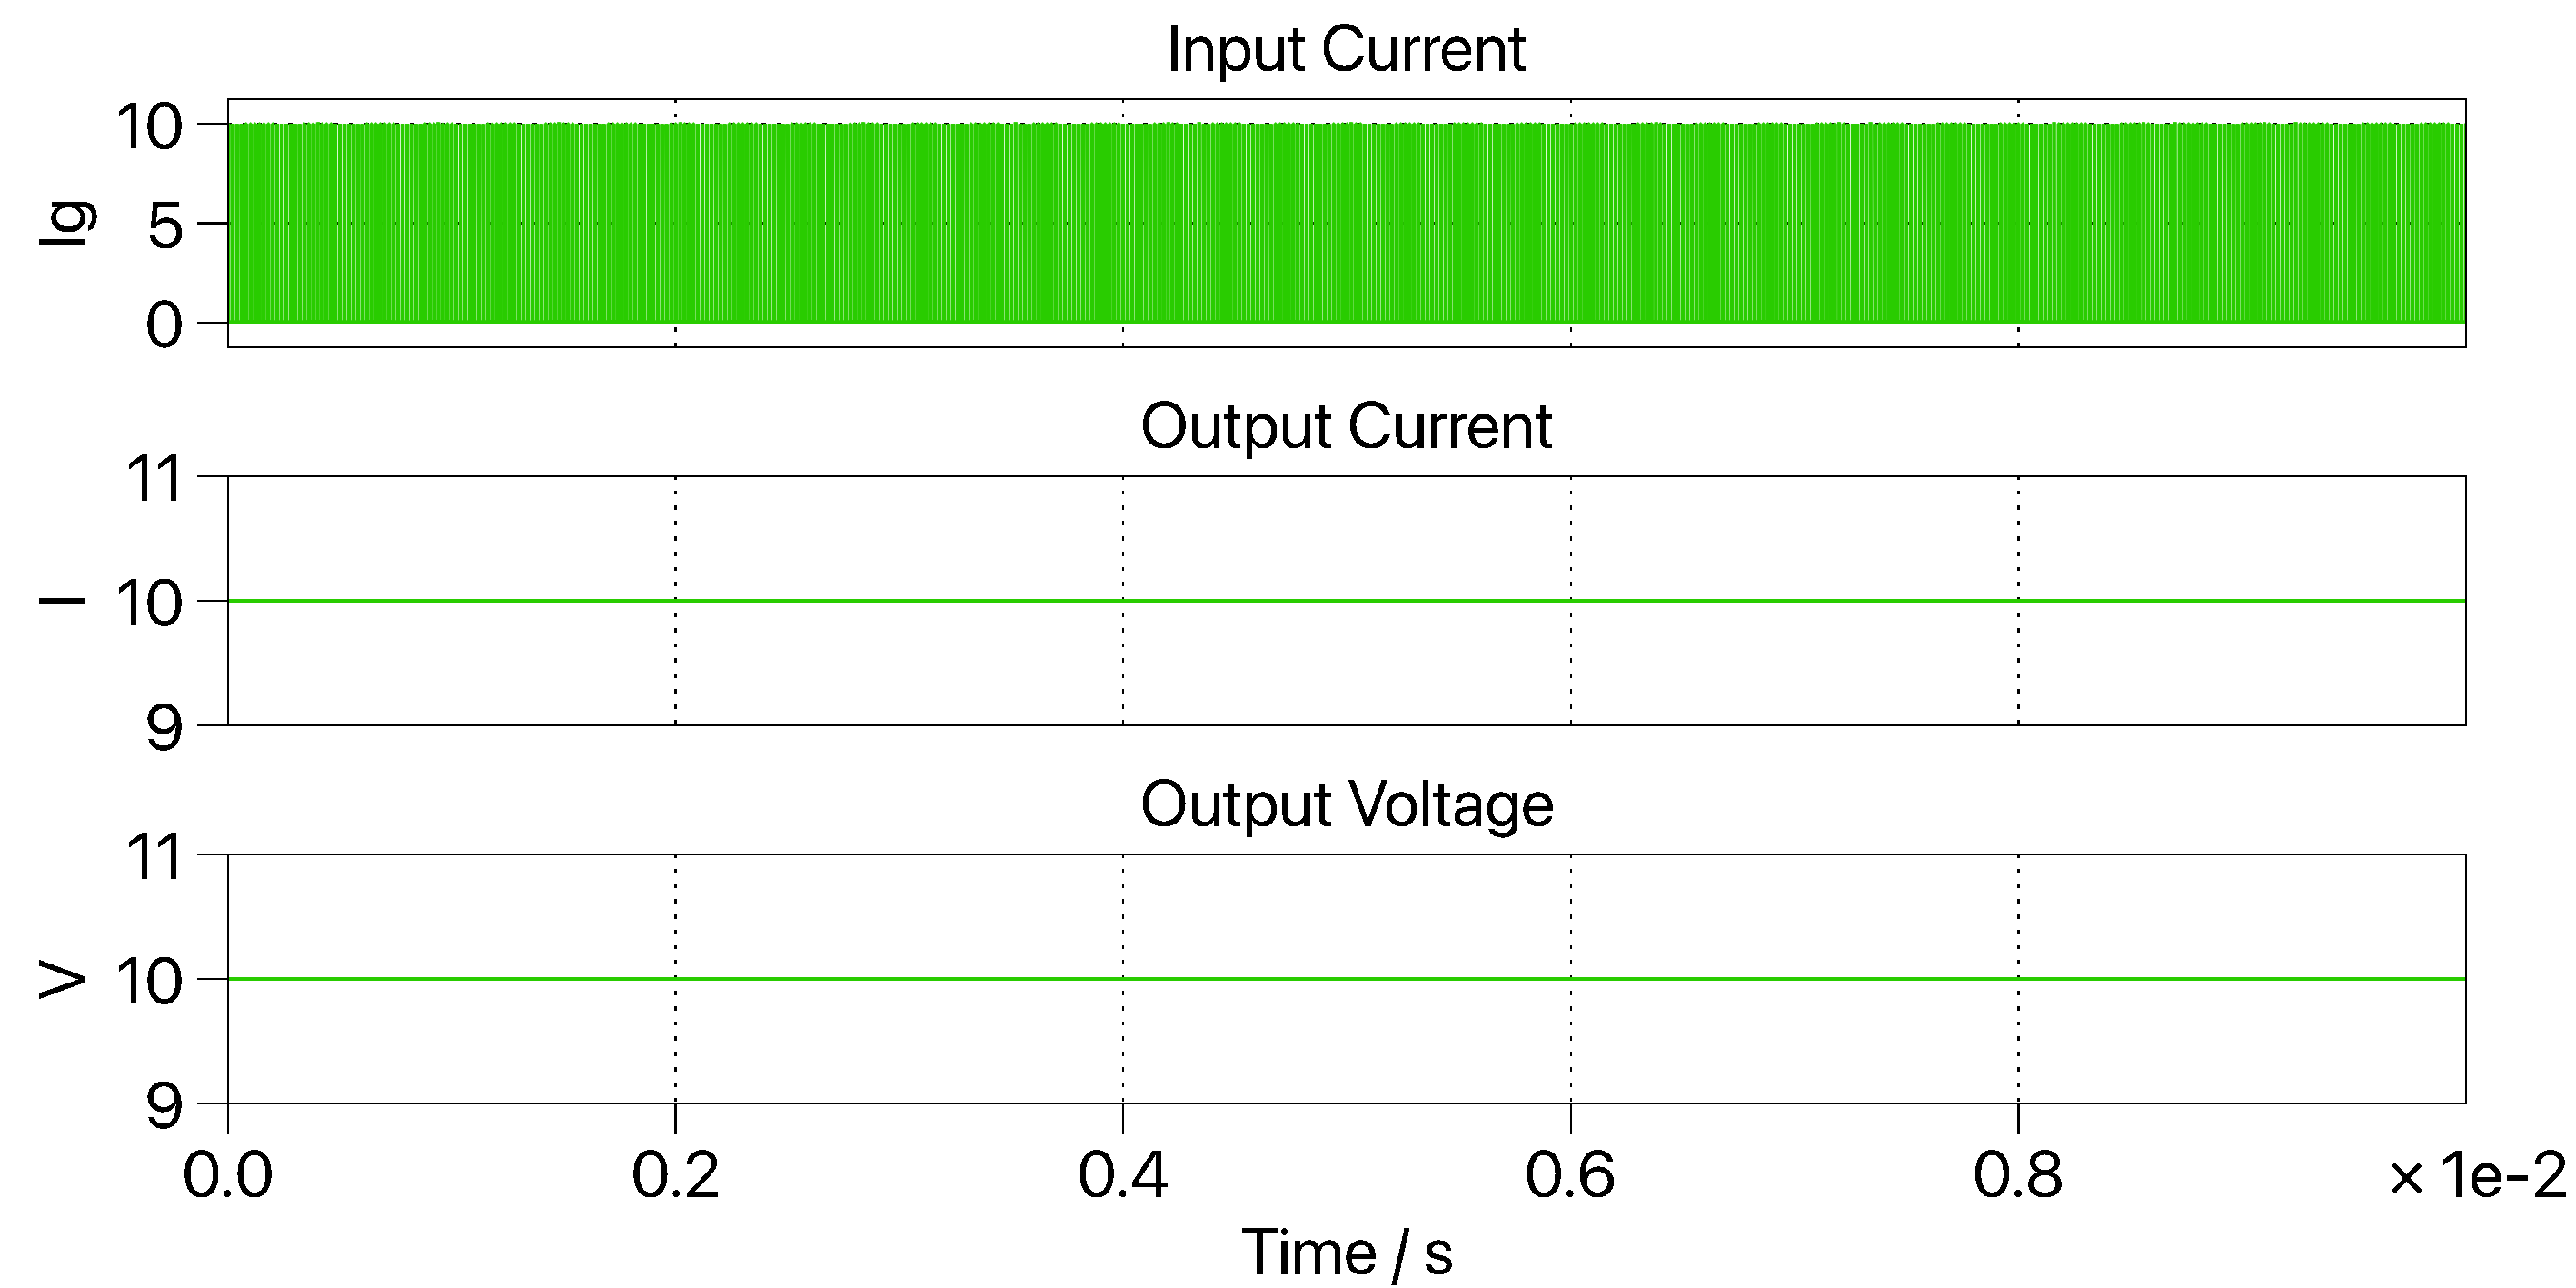
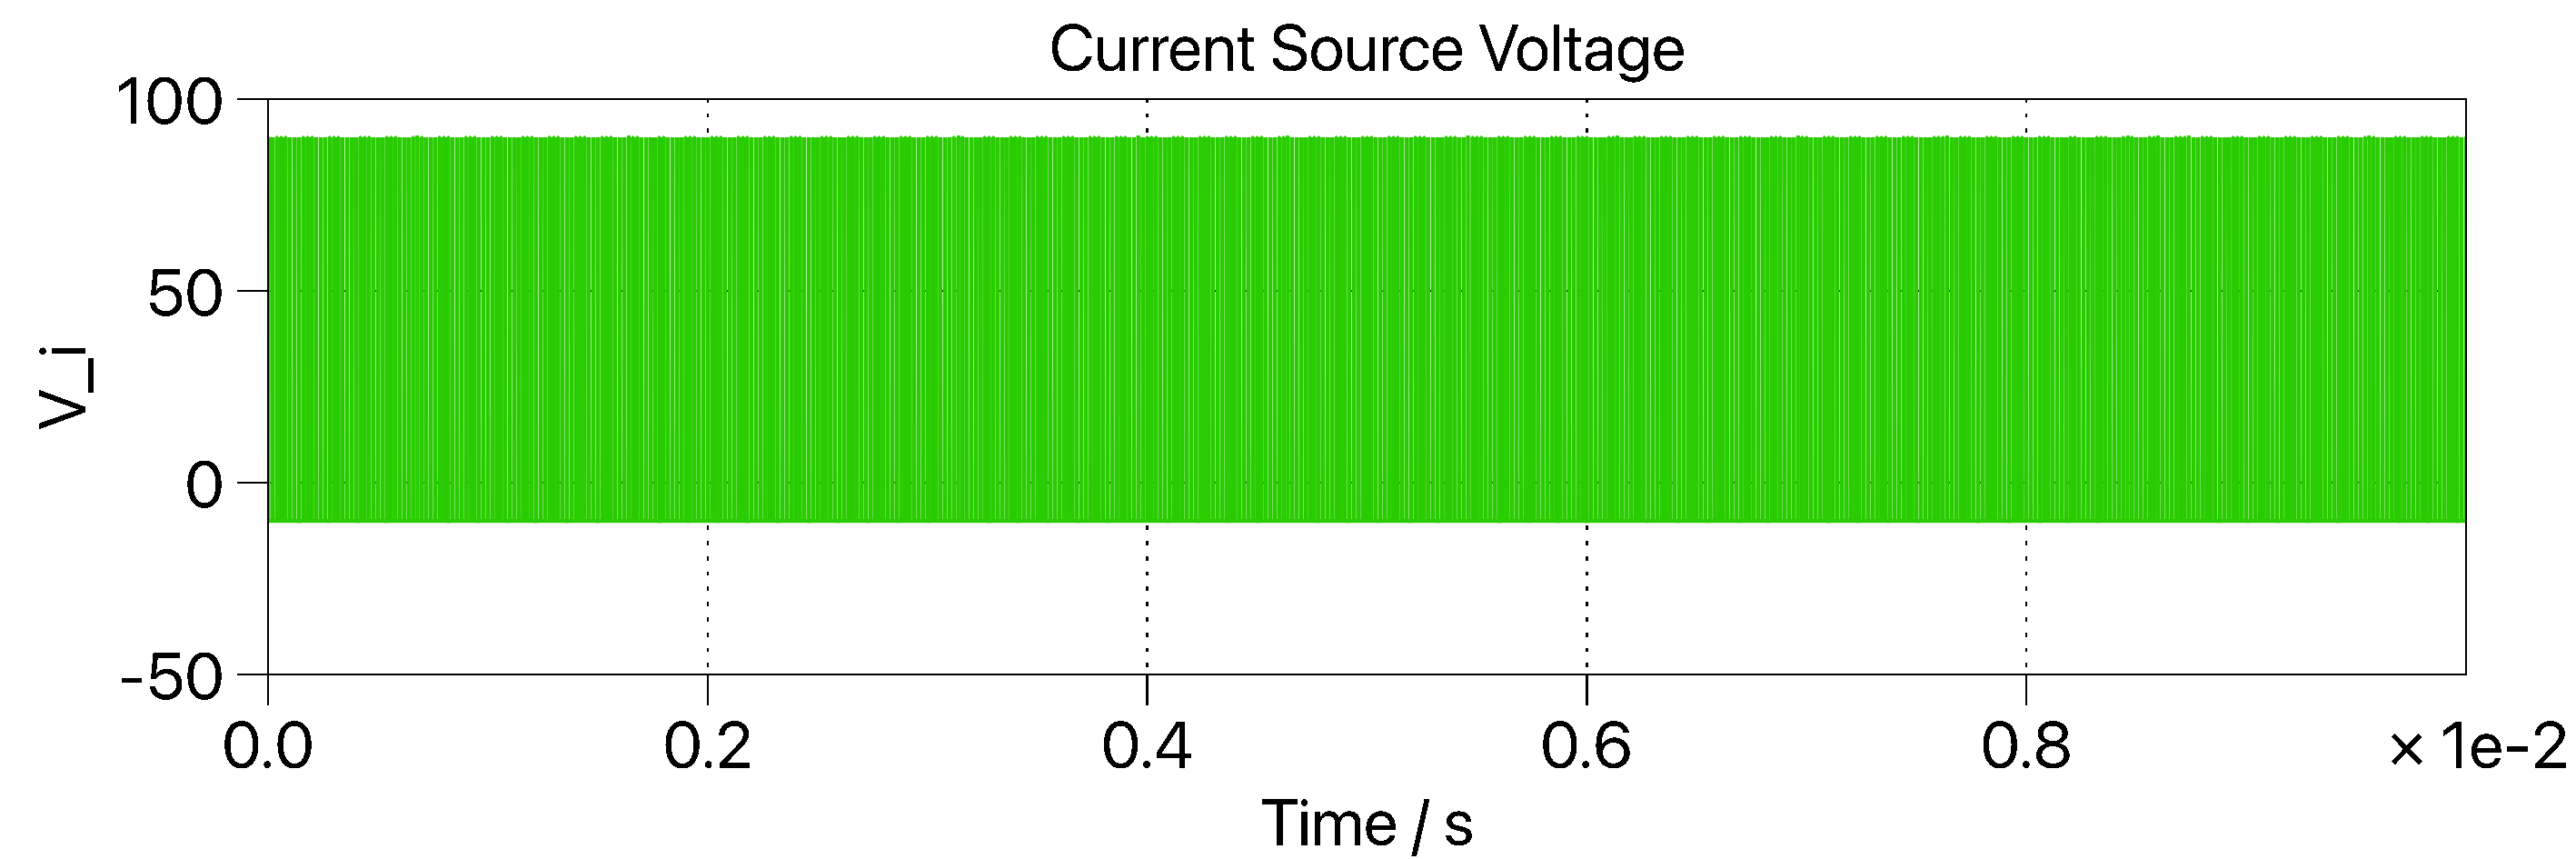
Input Current (Ig) peak: 10A

Input Current (Ig) avg: D\*10A = 0.1*10A = 1A


Output Current (I) peak: 10A

Output Current (I) avg: 10A


Output Voltage (V) peak: 10V

Output Voltage (V) avg: 10V

Inductor/Current Source Current (V_i) peak: 90A

Inductor/Current Source Current (V_i) average: D\*90A = 0.1*90A = 9A

#### Q2: Which waveforms have a small (or no) ripple versus large ripple?

Input current and current source current have a large ripple (the switching frequency) while output current and output voltage have no ripple.

#### Q3: Which components supply power and which dissipate power?

The voltage source supplies power while the load resistor dissipates power. The switch and diode are ideal so they do not dissipate power.

# 1mH Inductor Configuration
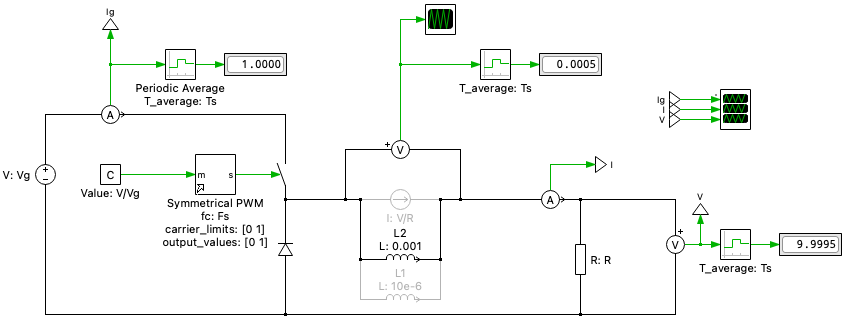
#### Q4: How are the waveforms different? What do they have in common with the prior simulation?
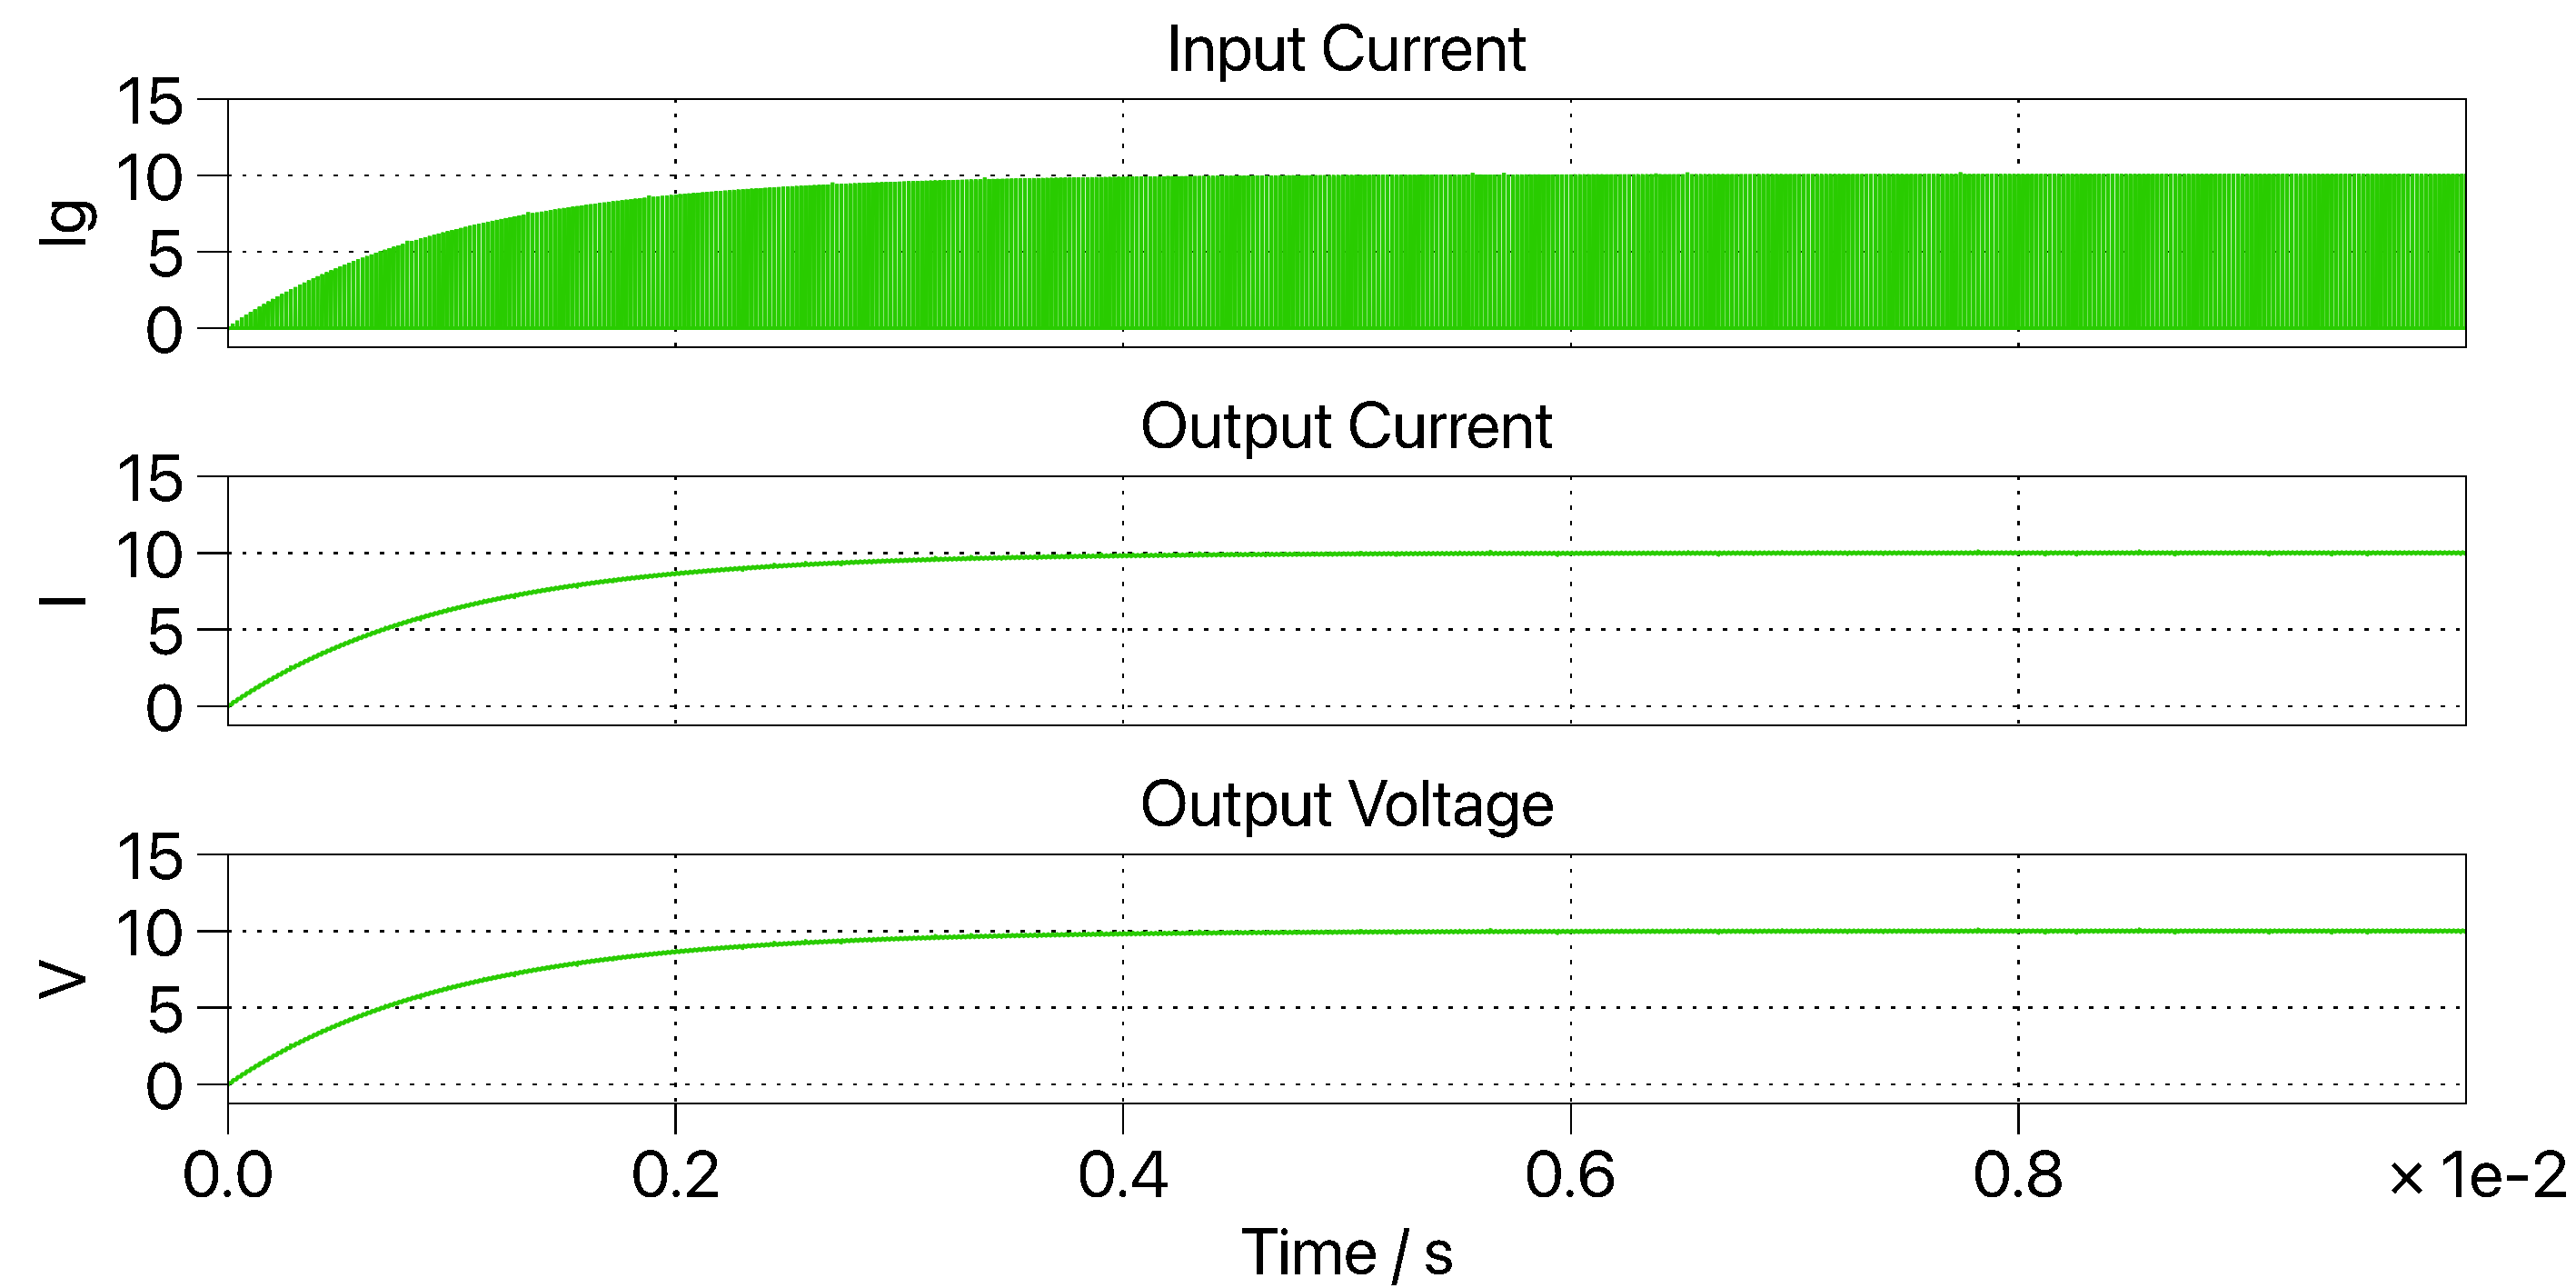
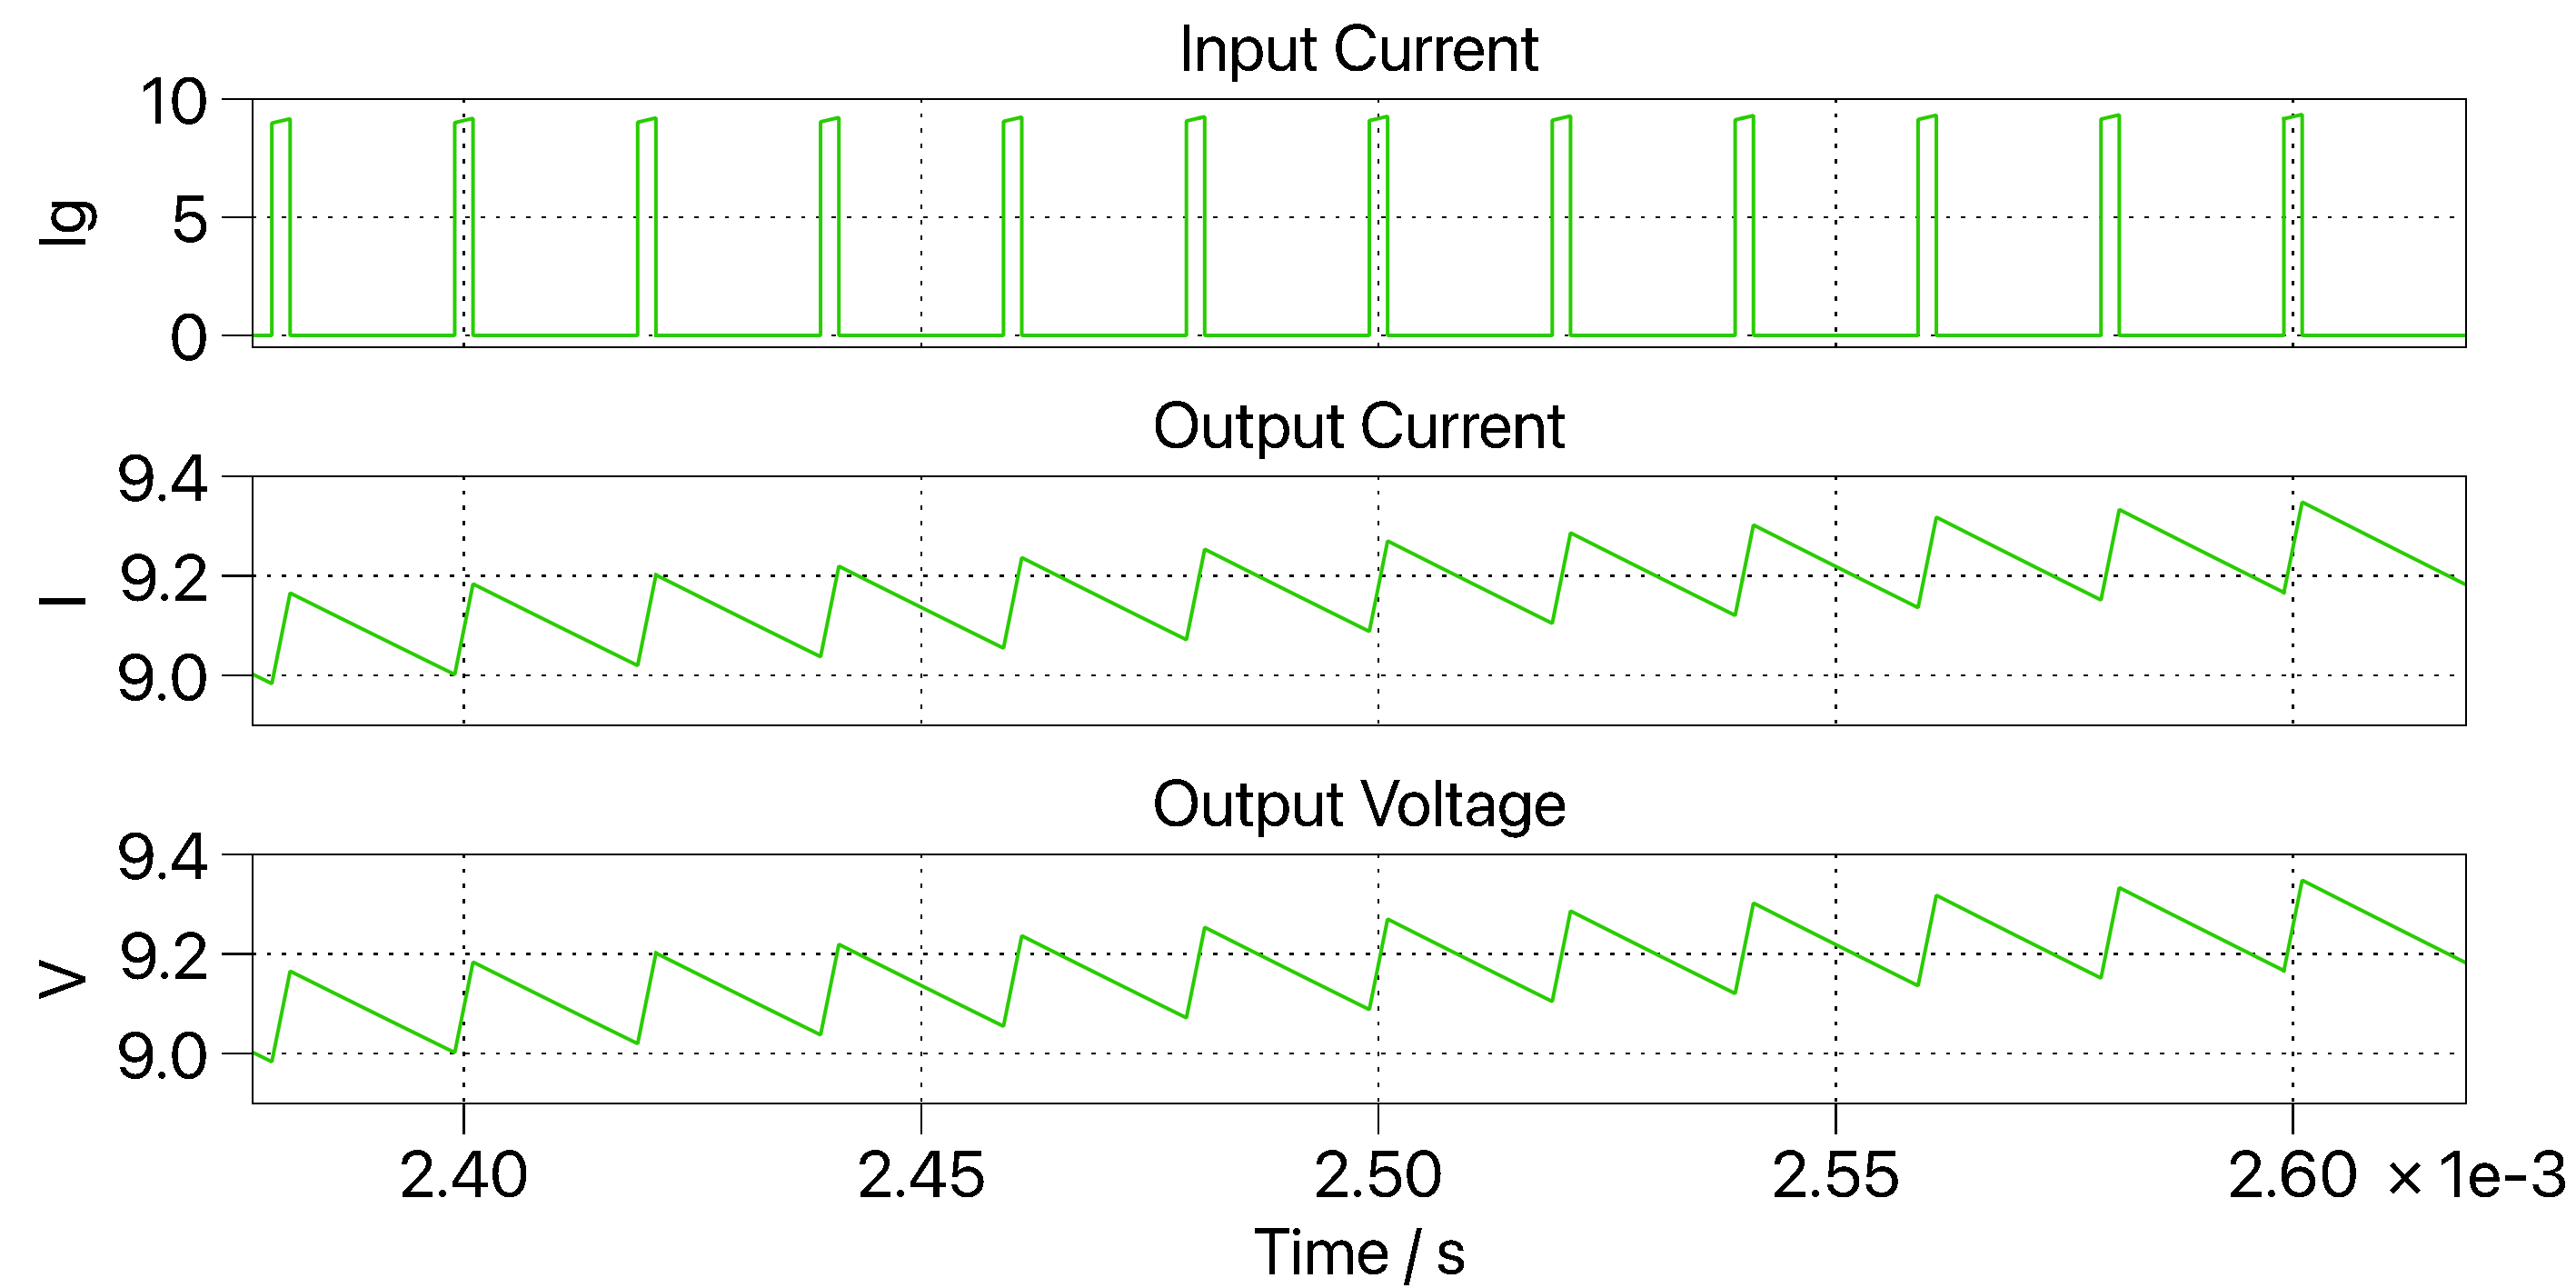
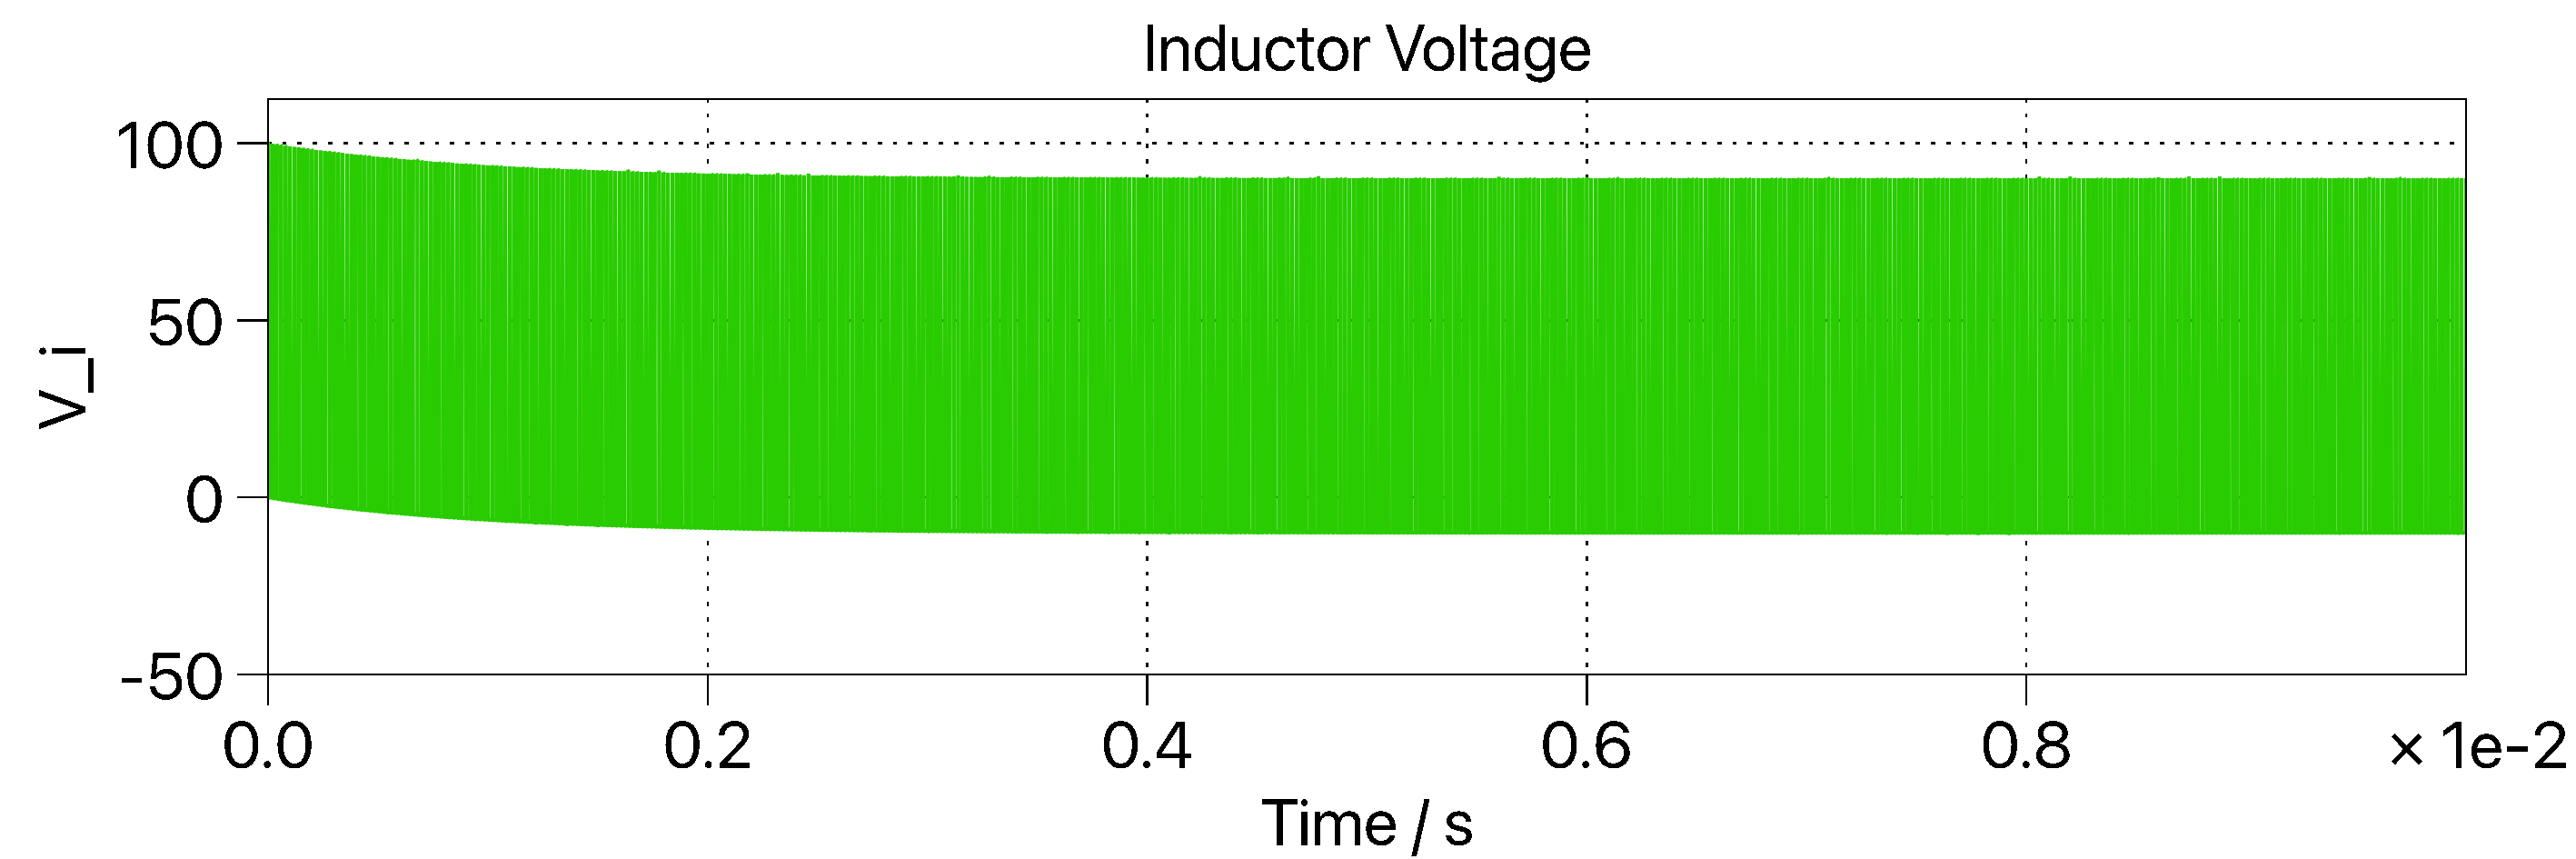

In the previous simulation, the input current is a perfect square wave with no ramping whatsoever. Note that the timescale on this second set of plots is 1e-2 seconds instead of 1e-4 seconds to get a better picture of the overall behavior of the current. The first image had an intentional 1e-4 timescale so you can see the exact shape of the small and unvarying in steady state waveform of the input current.

Similarities: The maximum currents and output voltage values are the same as in the previous simulation. The duty cycle is the same, which means they switch at the same time. The inductor voltage starts at 100V and oscillates according to the same duty cycle. The input currents also eventually achieve the same average current of 1 amp, and in periodic steady state looks very similar (goes from 0 to 10A at the switching frequency) to the ideal current source scenario.

Differences: The voltage now slowly ramps up over the course of a few tenths of a second as a result of the time constant from the RL circuit. There is now significant ripple in the output current and output voltage as well. The output ripple at steady state has a sawtooth shape for both current and voltage (the beginnings of a logarithmic curve). Over time the maximum and average inductor voltages slowly decrease and reach an average steady state voltage lower than that of the original simulation. On a smaller scale, it can be observed that the input current wave is no longer a perfect square wave because of the time delay introduced by the inductor. 



#### Q5: After how much time does the circuit reach periodic steady-state?

In [3]:
5*1e-3/1 # Steady state time in seconds: 5*time constant = 5L/R

0.005

#### Q6: What is the average voltage across the inductor in periodic steady-state?
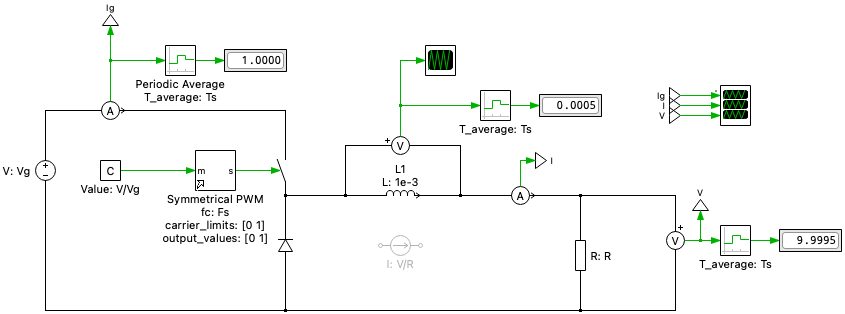

0.0005V (As seen in the block connected to T_average: Ts on the voltage measurement around the inductor)

#### Q7: What is the voltage conversion ratio for D=10% and D=50%?
The duty cycle is equal to the voltage conversion ratio for this circuit because it is operating in continuous conduction mode. This is evident because the output current and inductor current waveforms do not level off at any values. Thus, the following is the case:
M = V/Vg; V=D*Vg

M = D\*Vg/Vg = D

D=10%: M=0.1

D=50%: M=0.5

# 10uH Inductor Configuration
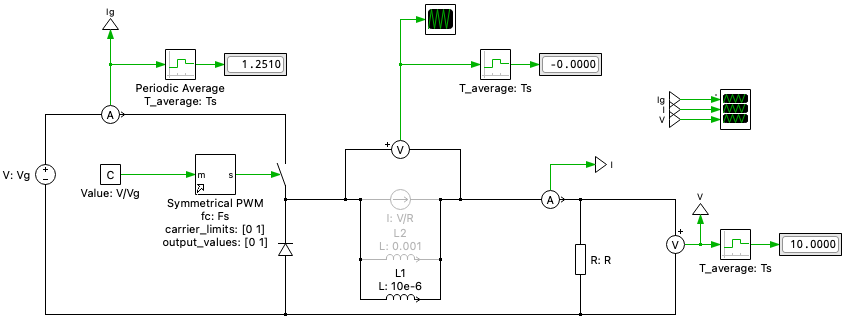
#### Q8: How are the waveforms changed with 10 uH? Comment thoroughly.
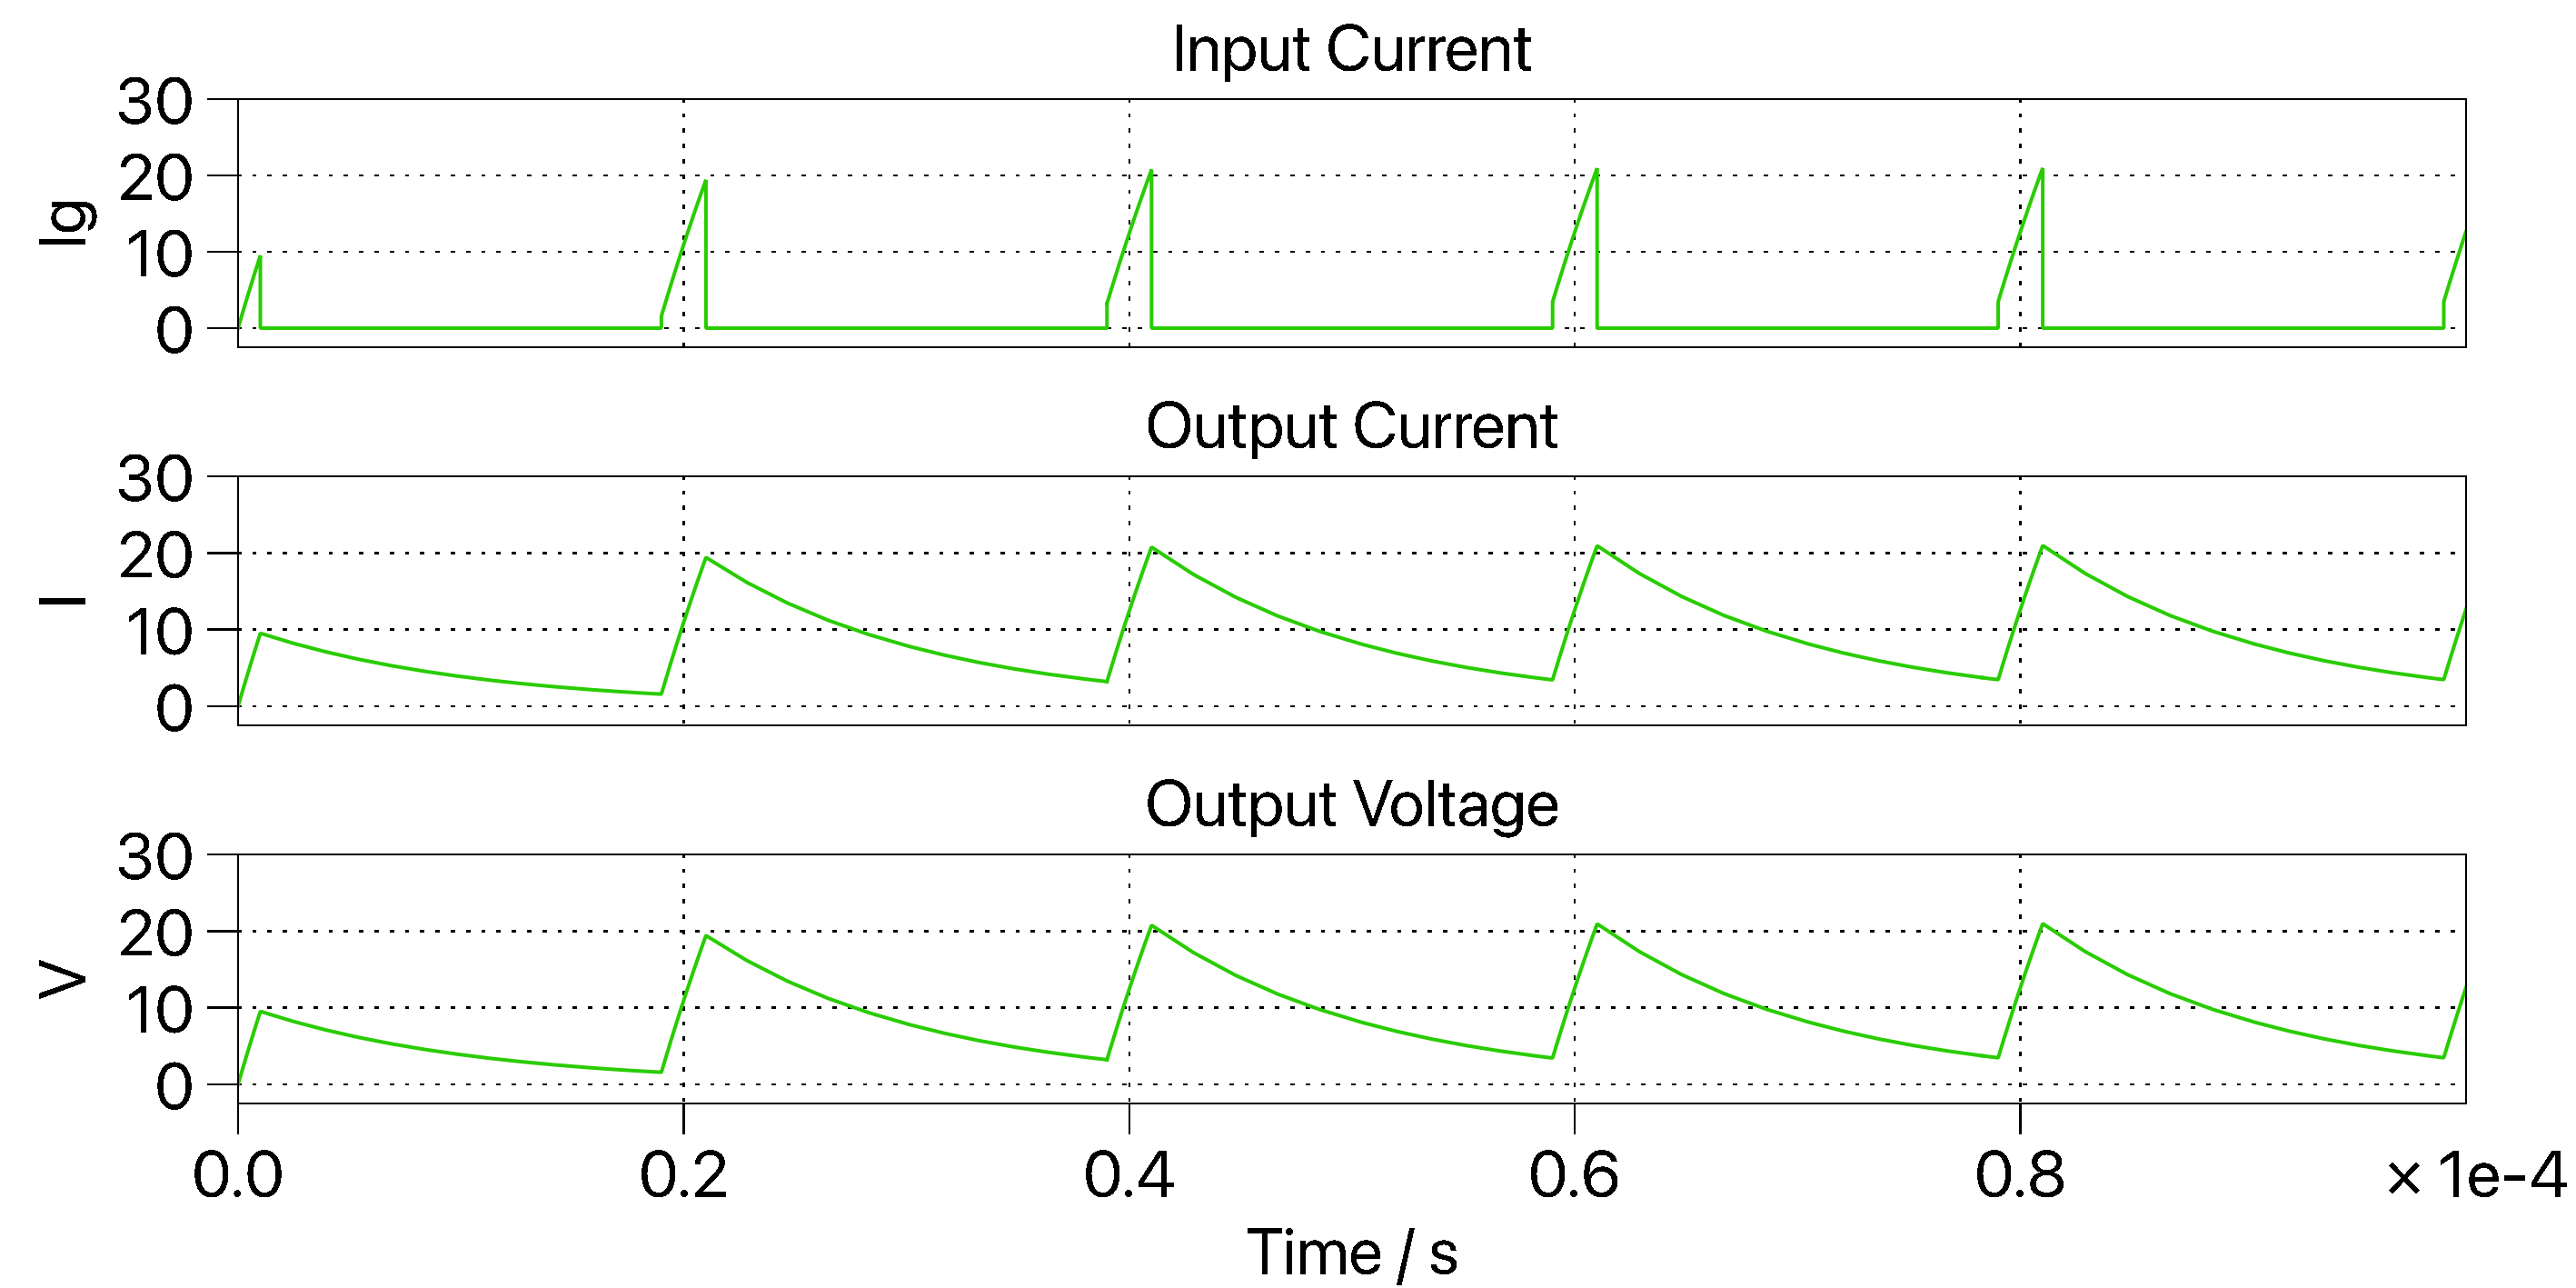
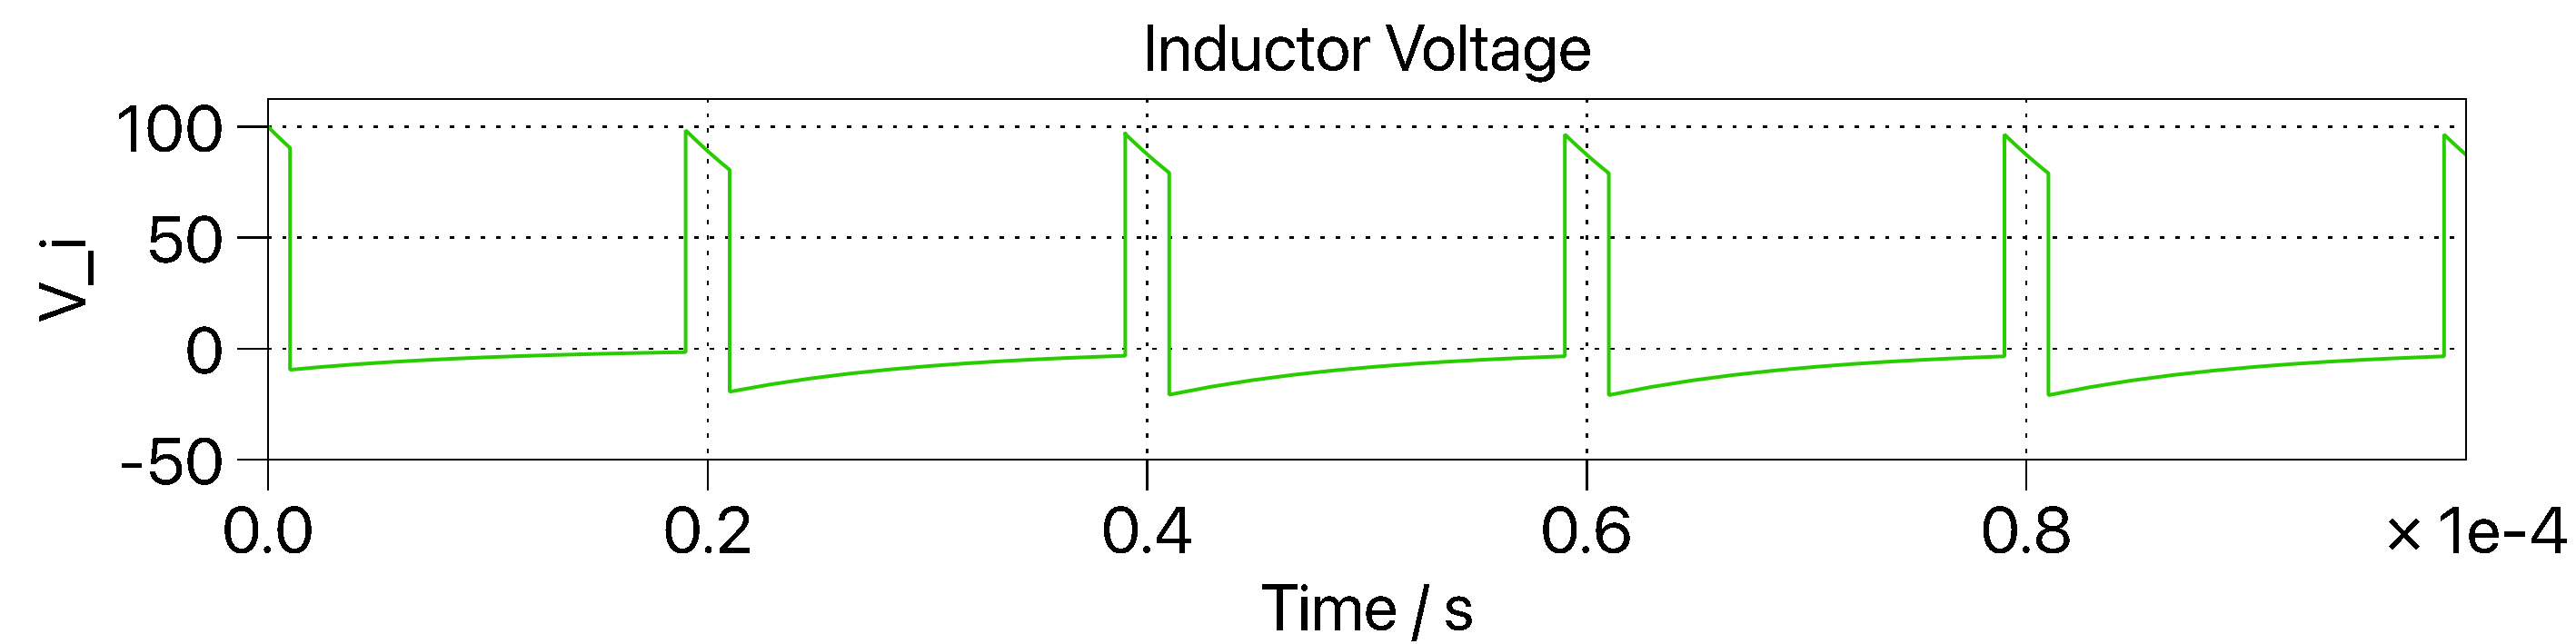

The sawtooth shape on the output current and output voltage waves is visibly rounded, as is the eventual inductor voltage. This is becasue the time constant (still defined by L/R as before) has increased greatly while the switching frequency remains the same, meaning $\tau$ is not << $T_{s}$. 
# ANSWER 

# 100uF Capacitor + Ammeter Configuration
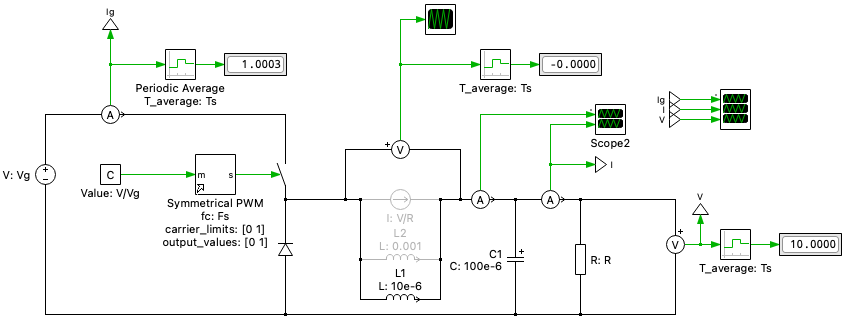
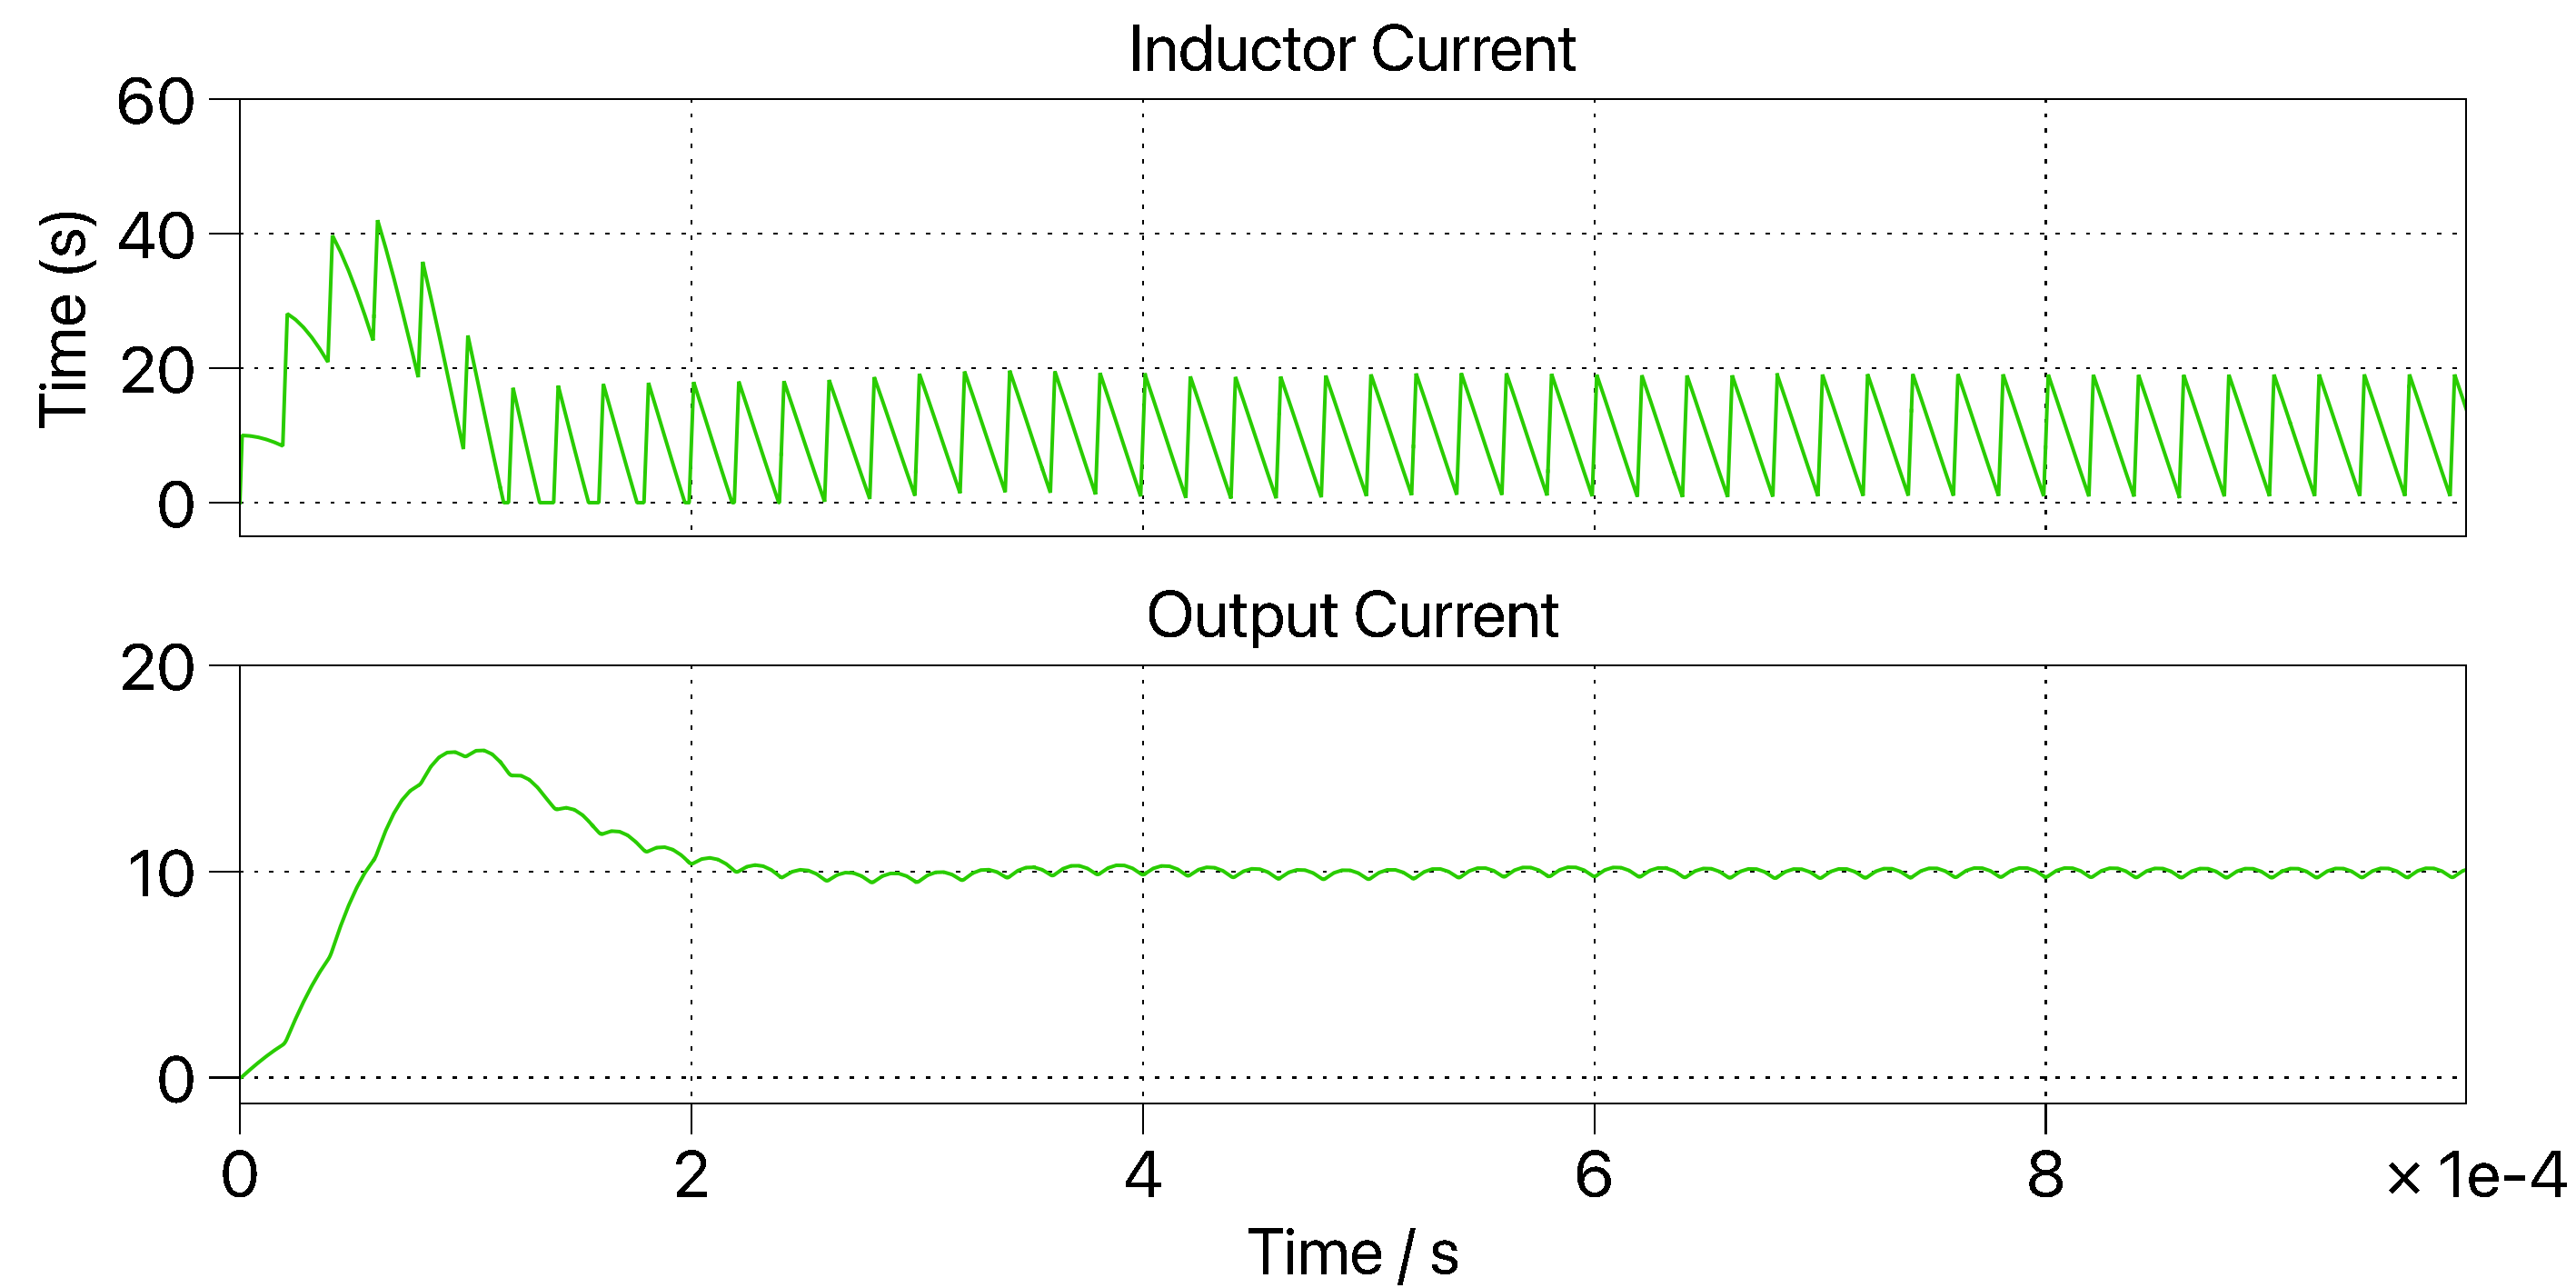
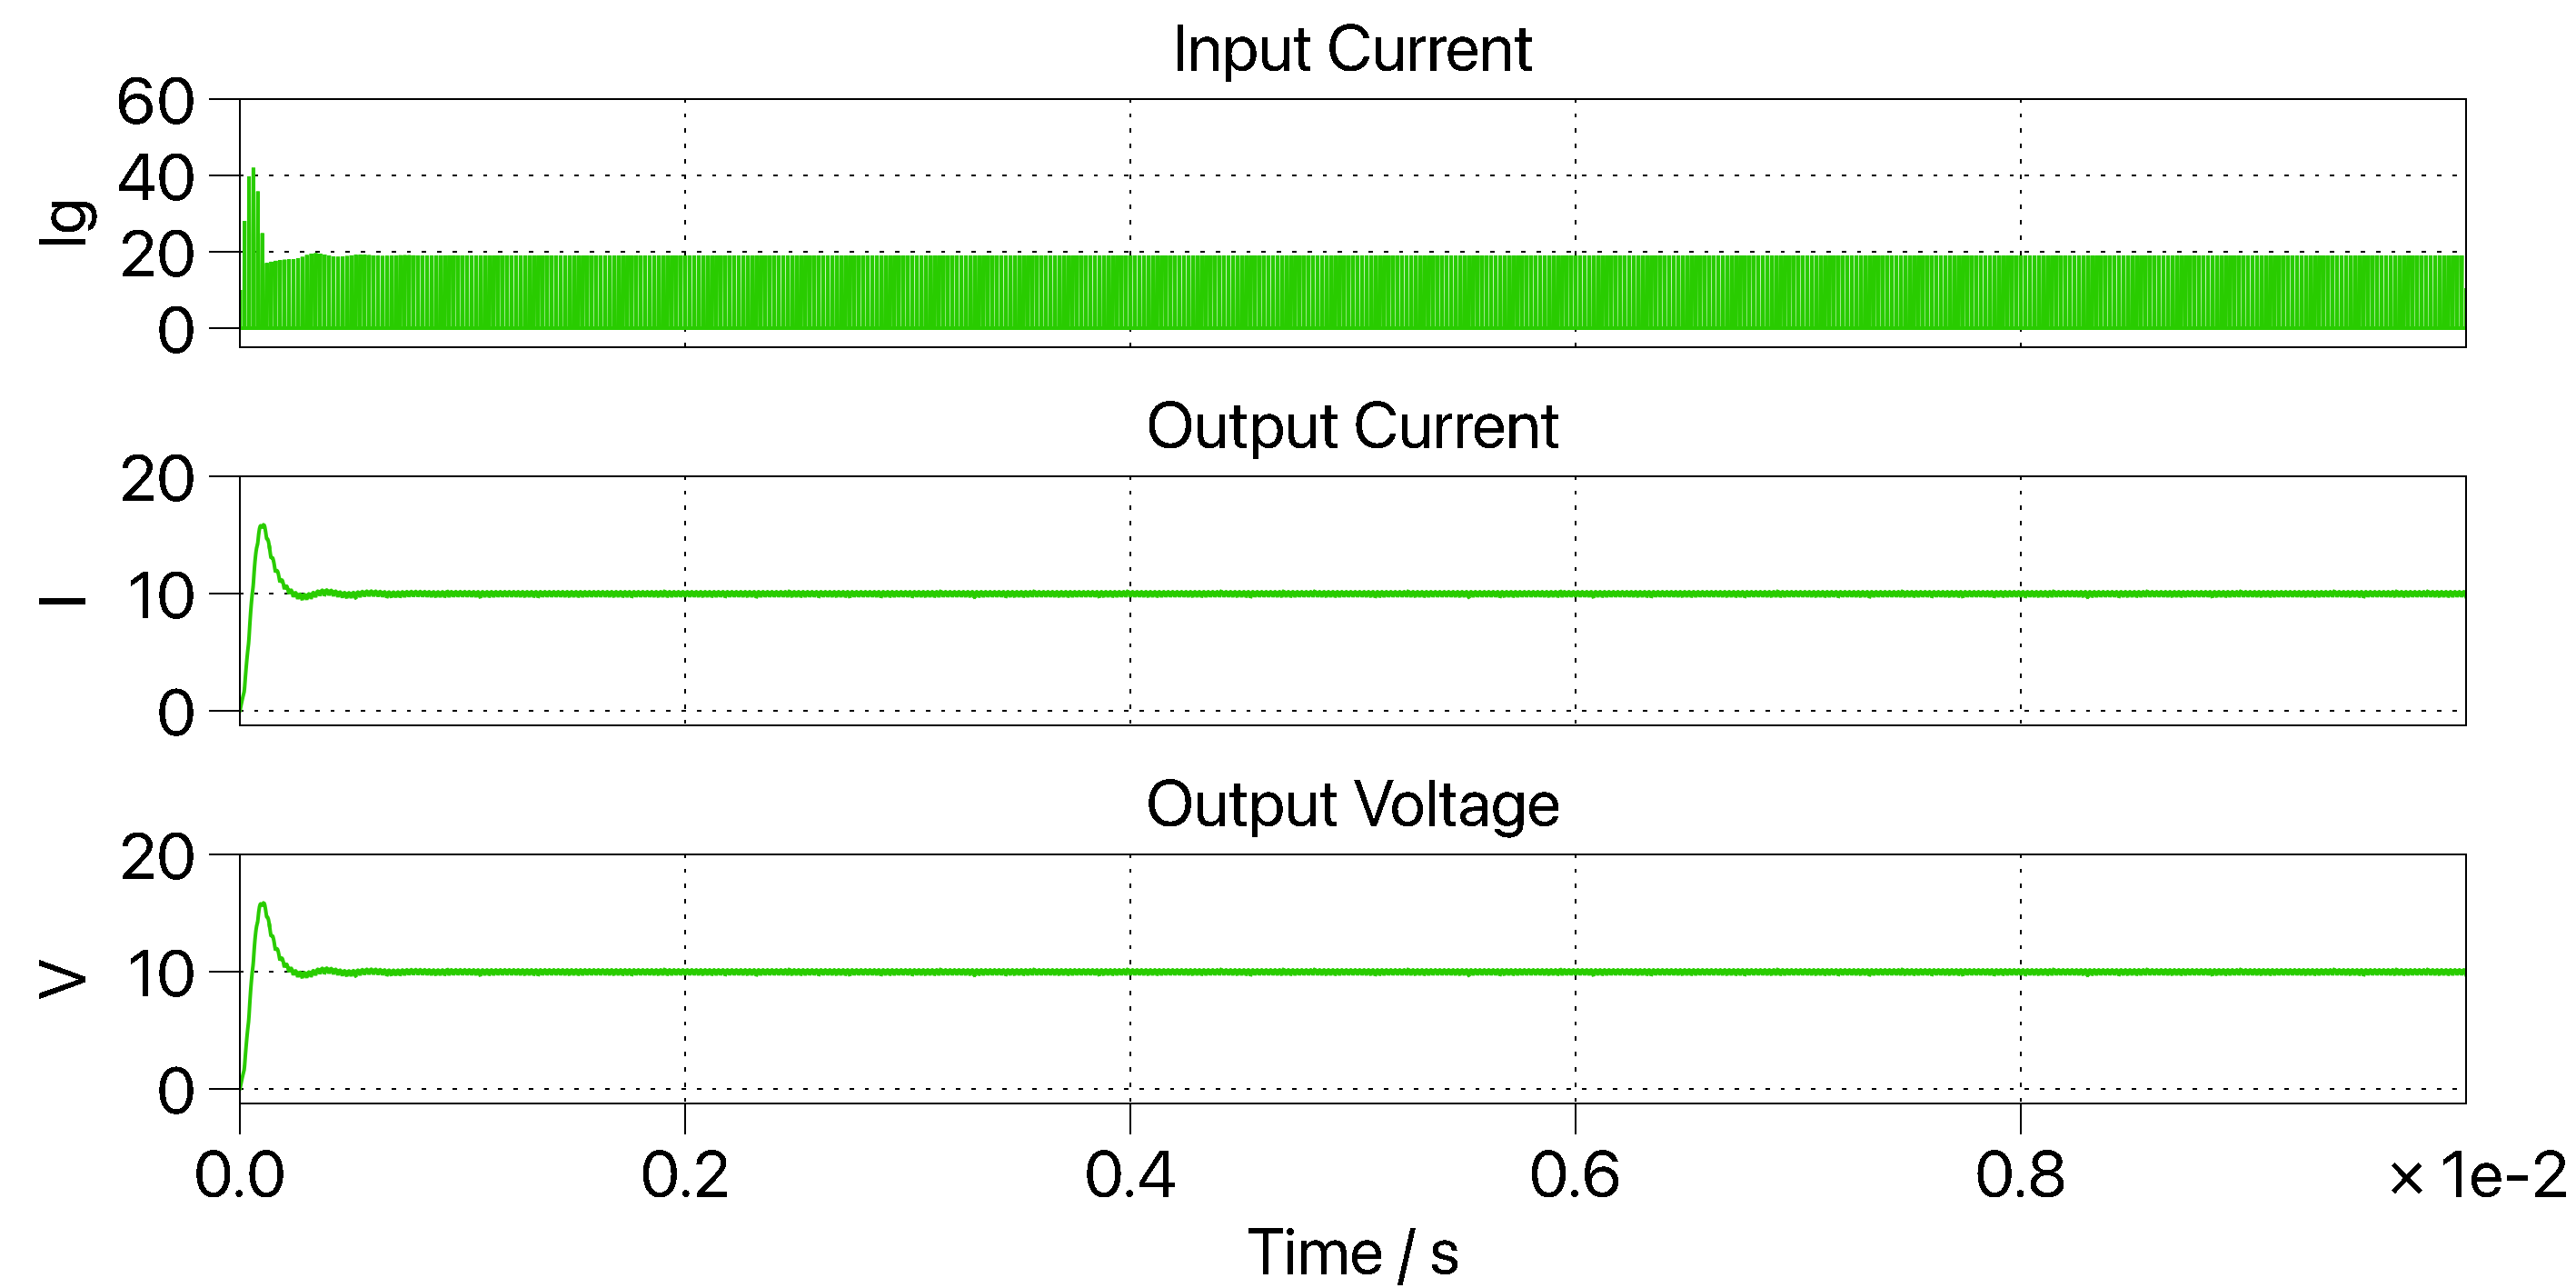
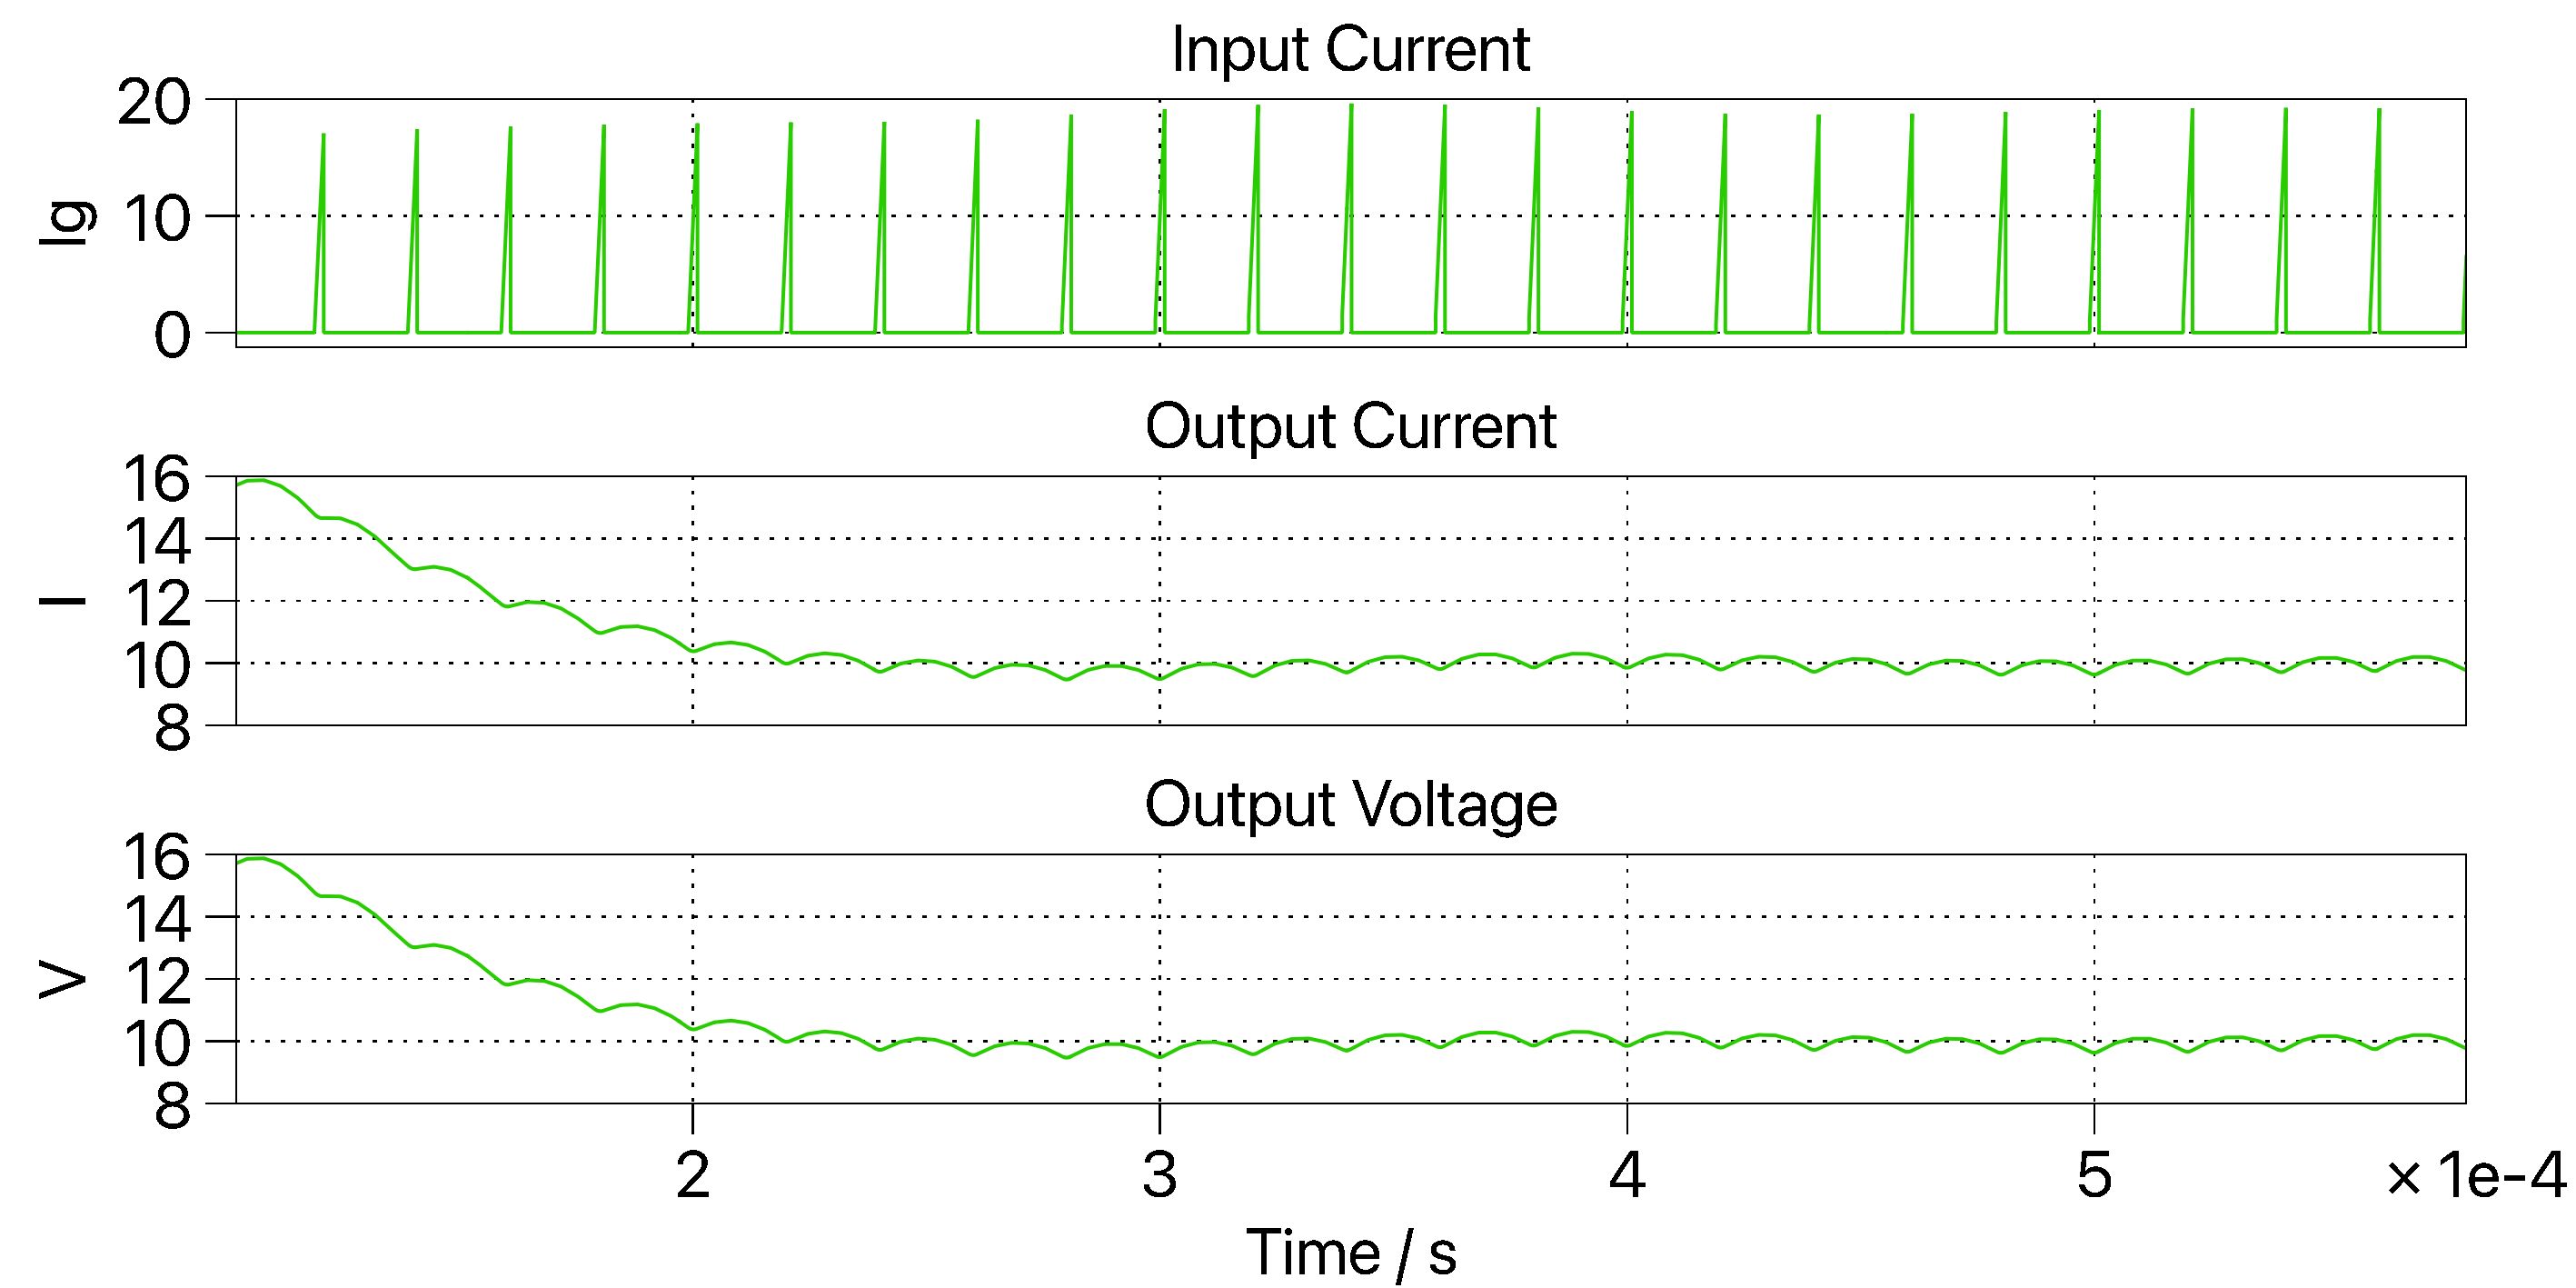
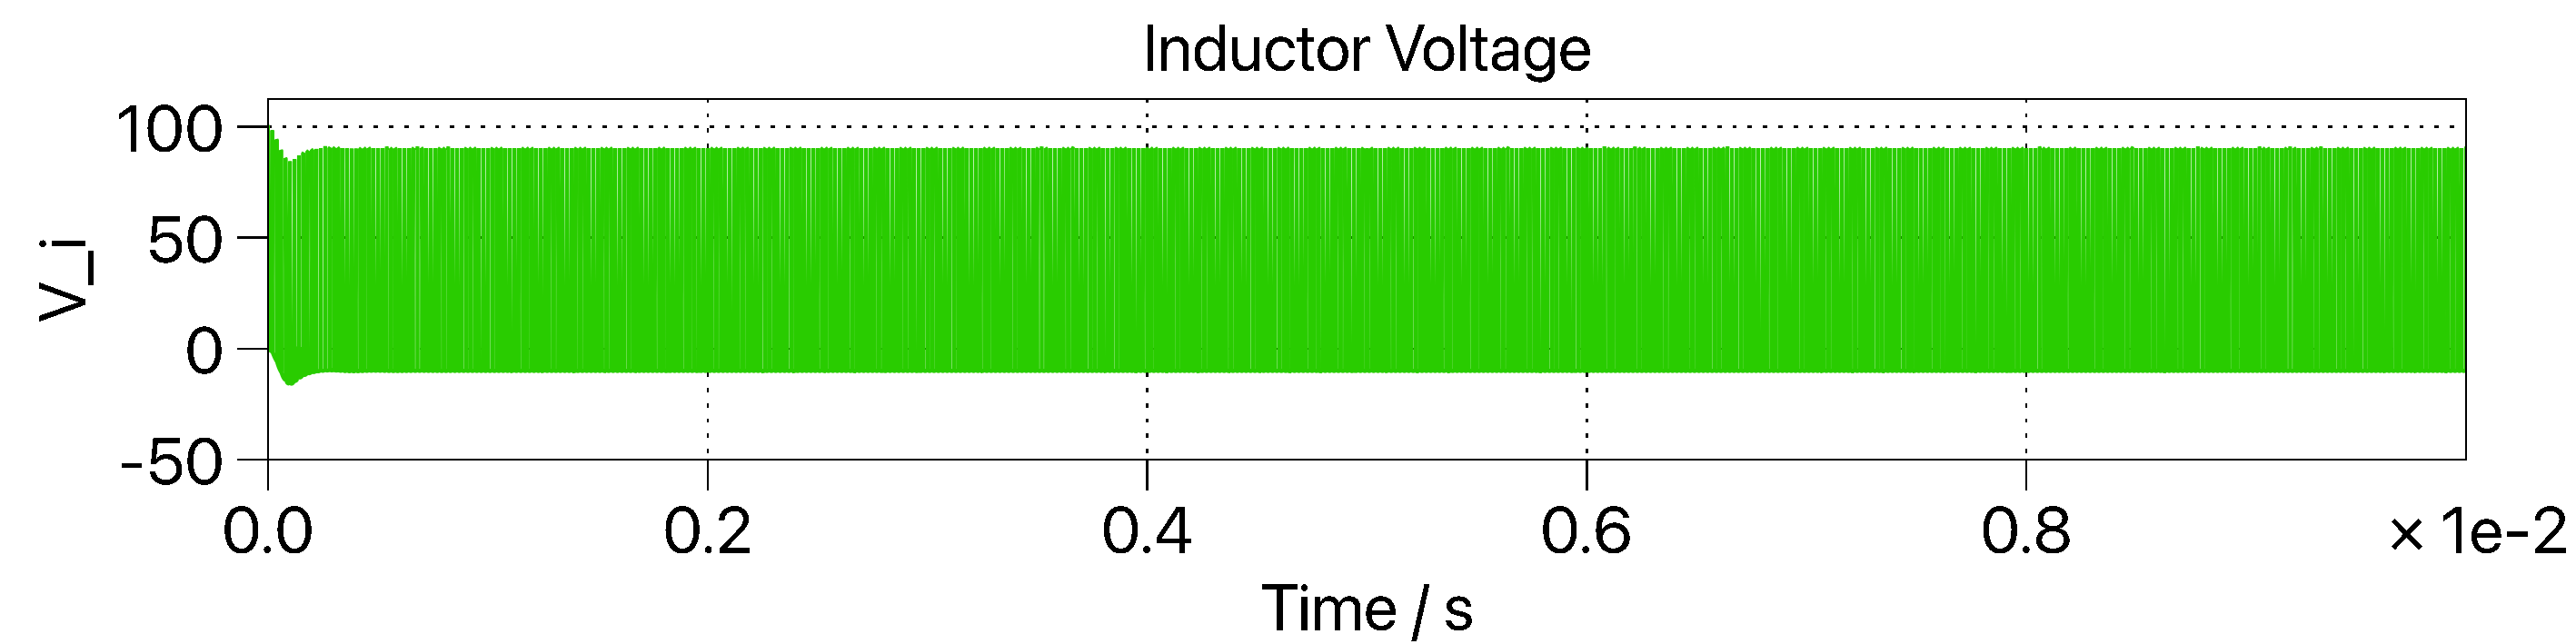
#### Q9: How have the waveforms changed? Compare the current before and after the capacitor. Which would you consider to have low-ripple and which large-ripple characteristics? What is effect of the capacitor?

The inductor current and voltage before the capacitor has much more ripple before than after -- the inductor current has ~10A amplitude ripple, and after the capacitor has an extremely small amplitude less than 0.5A. The capacitor filters out the high-frequency current and voltage changes and reduces the ripple on both waveforms by absorbing those changes through a low-pass filter configuration. Thus, I consider the output current and output voltages to be low-ripple while the inductor voltage and inductor voltage are large-ripple. Furthermore, adding in the capacitor turns this into an RLC circuit with second order behavior, causing overshooting at the start of the waveforms that then levels out slowly.

# Type 1 Switch Cell Circuit
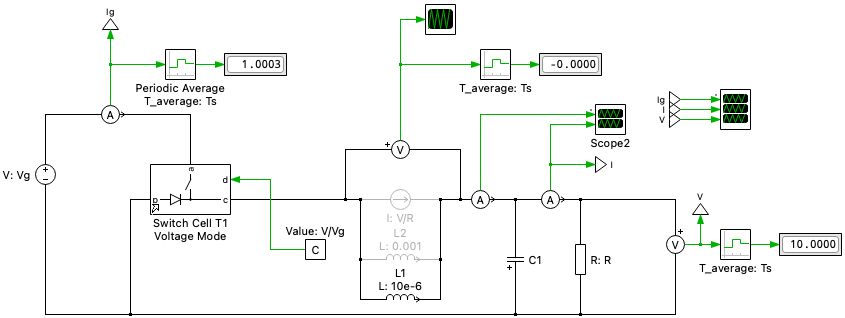
#### Q10: Explain why the block defined by the brown rectangle (not shown on mine) can be approximated by an ideal transfomer.
An ideal transformer turns the AC voltage across its primary side instantaneously to an AC voltage with an average value of D*Vg on the secondary side, where D is defined as the turns ratio. Our switch cell mimics this behavior by switching the voltage on and off to create an AC wave with an average voltage value also defined as D\*Vg where this D is representative of the duty cycle. In this way, a switch cell mimics an ideal transformer.

### Run a sim with L=10uH and L=5uH
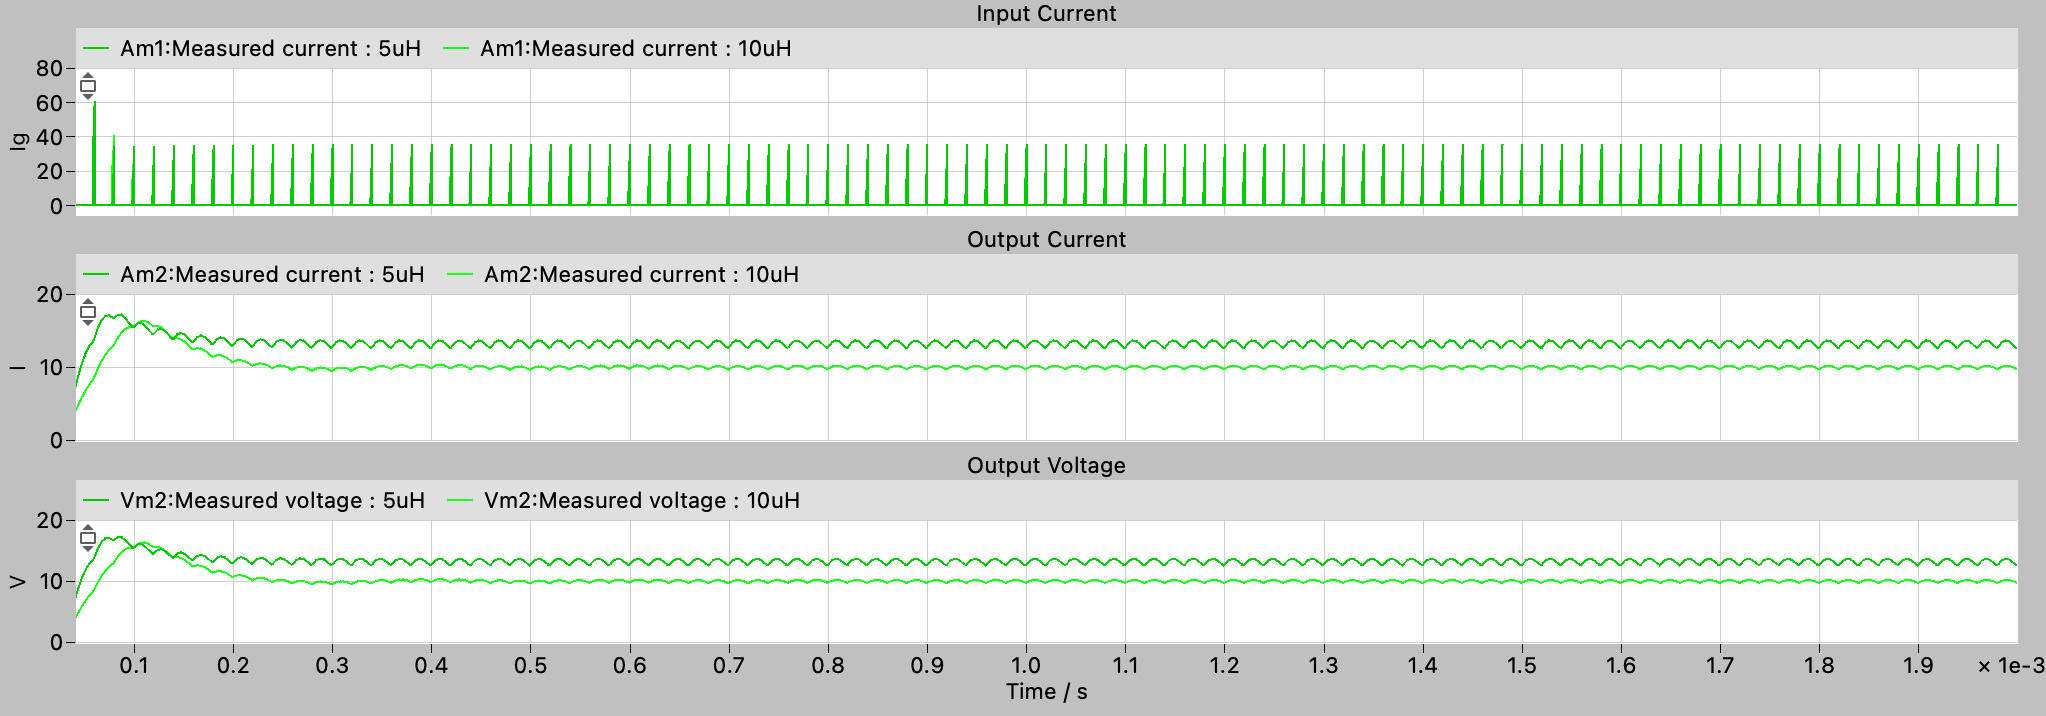
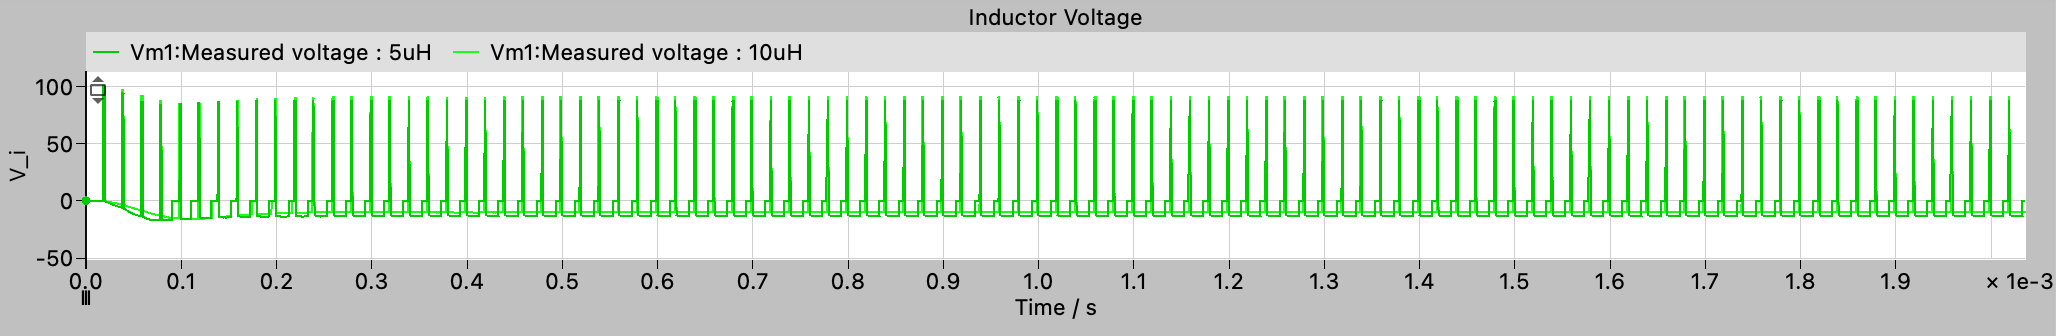
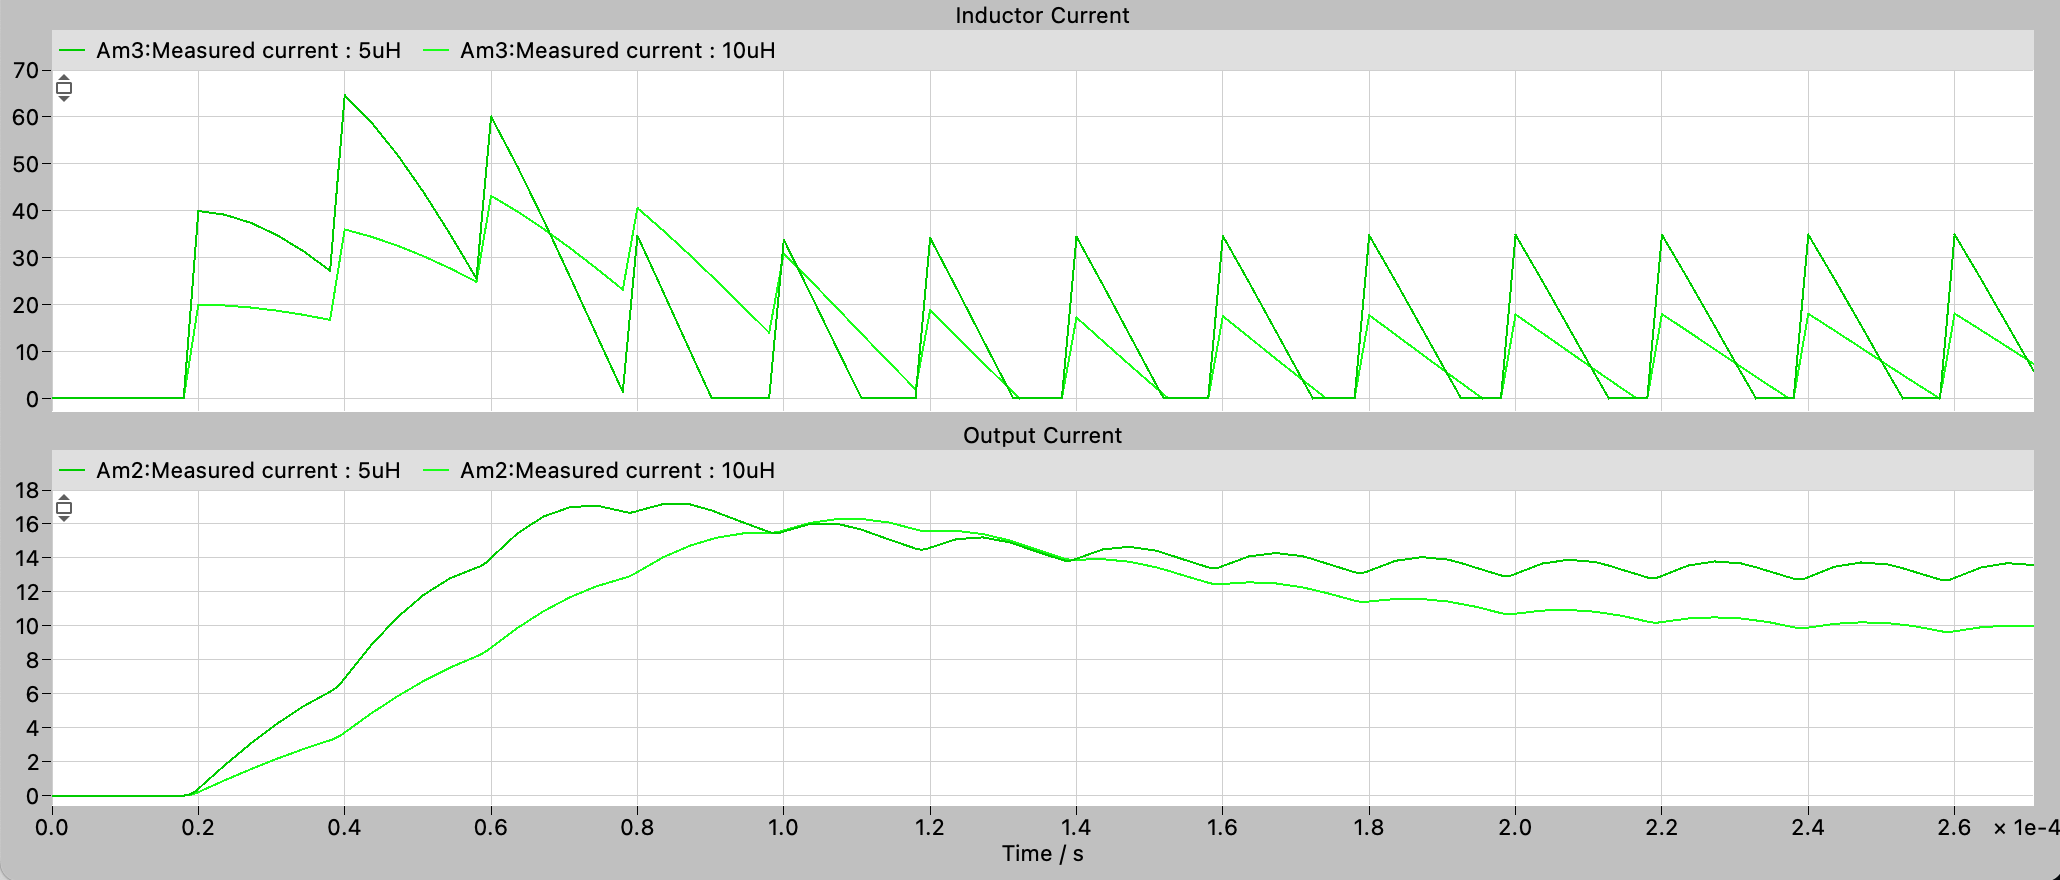
#### Q11: Which interesting observations can be made comparing the simulation results for L=10 uH with the the results for L=5 uH? Use the "Hold trace" feature in the PLECS scope to compare the waveforms. Zoom into the inductor current waveform! Be thorough.	

The last plot (inductor current and output current) shows that both 10 uH and 5 uH operate in DCM, as the inductor current reaches 0 and stays there for a short time. However, 10uH is closer to BCM than 5uH is, since it spends less time at an inductor current of 0. This makes sense since more inductance is directly correlated with less time spent at 0A.

It then follows that there is substantially less ripple on the 10uH output waveforms, but that the 5uH waveforms ramp up much faster. The current reaches steady state a little less than 0.1s earlier for the 5uH inductor value than for the 10uH inductor value. Additionally, the average output current for the 5 uH inductor is higher than that of the 10 uH inductor. This occurs because the lower inductance allows for a steeper current slope ($di/dt$), resulting in a higher peak current for the same switching period and thus delivering more total charge to the load per cycle. This is also visually evident in the inductor current plot, where it can be seen that the 5uH inductor has higher steeper peaks than the 10uH one.

#### Q12: Create a plot for the voltage conversion ratio as a function of inductance (D=10%) for L=1 uH to 15 uH, taking 1 uH increments. Comment on what you see!

Text(0, 0.5, 'Voltage Conversion Ratio')

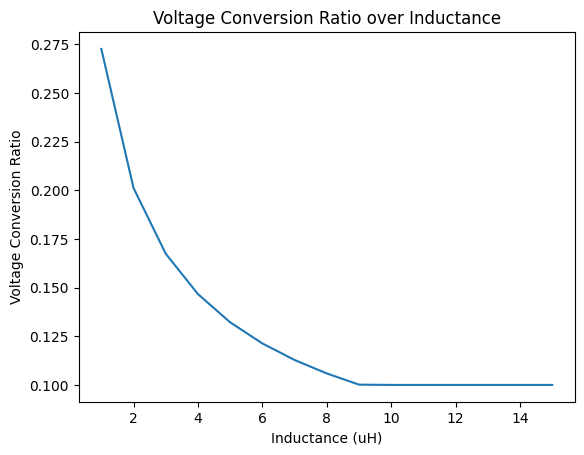

In [6]:
import matplotlib.pyplot as plt
import numpy as np
V_G = 100
L = list(range(1,16))
V = [
    27.2618, 20.1165, 16.7404, 14.6666, 13.2152, 
    12.1311, 11.2805, 10.5895, 10.0134, 9.9990, 
    9.9990, 9.9990, 9.9990, 9.9990, 9.9990
]
plt.plot(L, np.divide(V,V_G))
plt.title("Voltage Conversion Ratio over Inductance")
plt.xlabel("Inductance (uH)")
plt.ylabel("Voltage Conversion Ratio")

There is an exponential relationship between the voltage conversion ratio and the inductance. At an inductance value of 10uH, the voltage conversion ratio is at its minimum.

# ANSWER BETTER


# Type 2 Switch Cell Buck Converter Circuit
#### Q13: Create an equivalent buck converter circuit using a Type 2 switch cell. Hint: This circuit will not have a common ground between input and output but rather a common positive rail
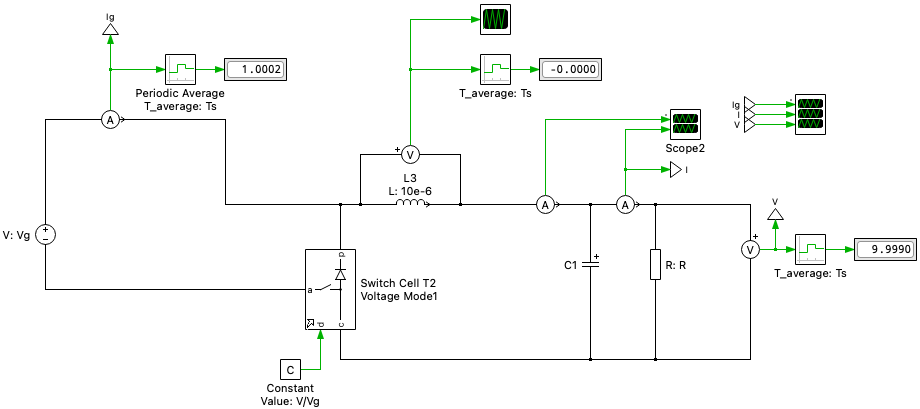
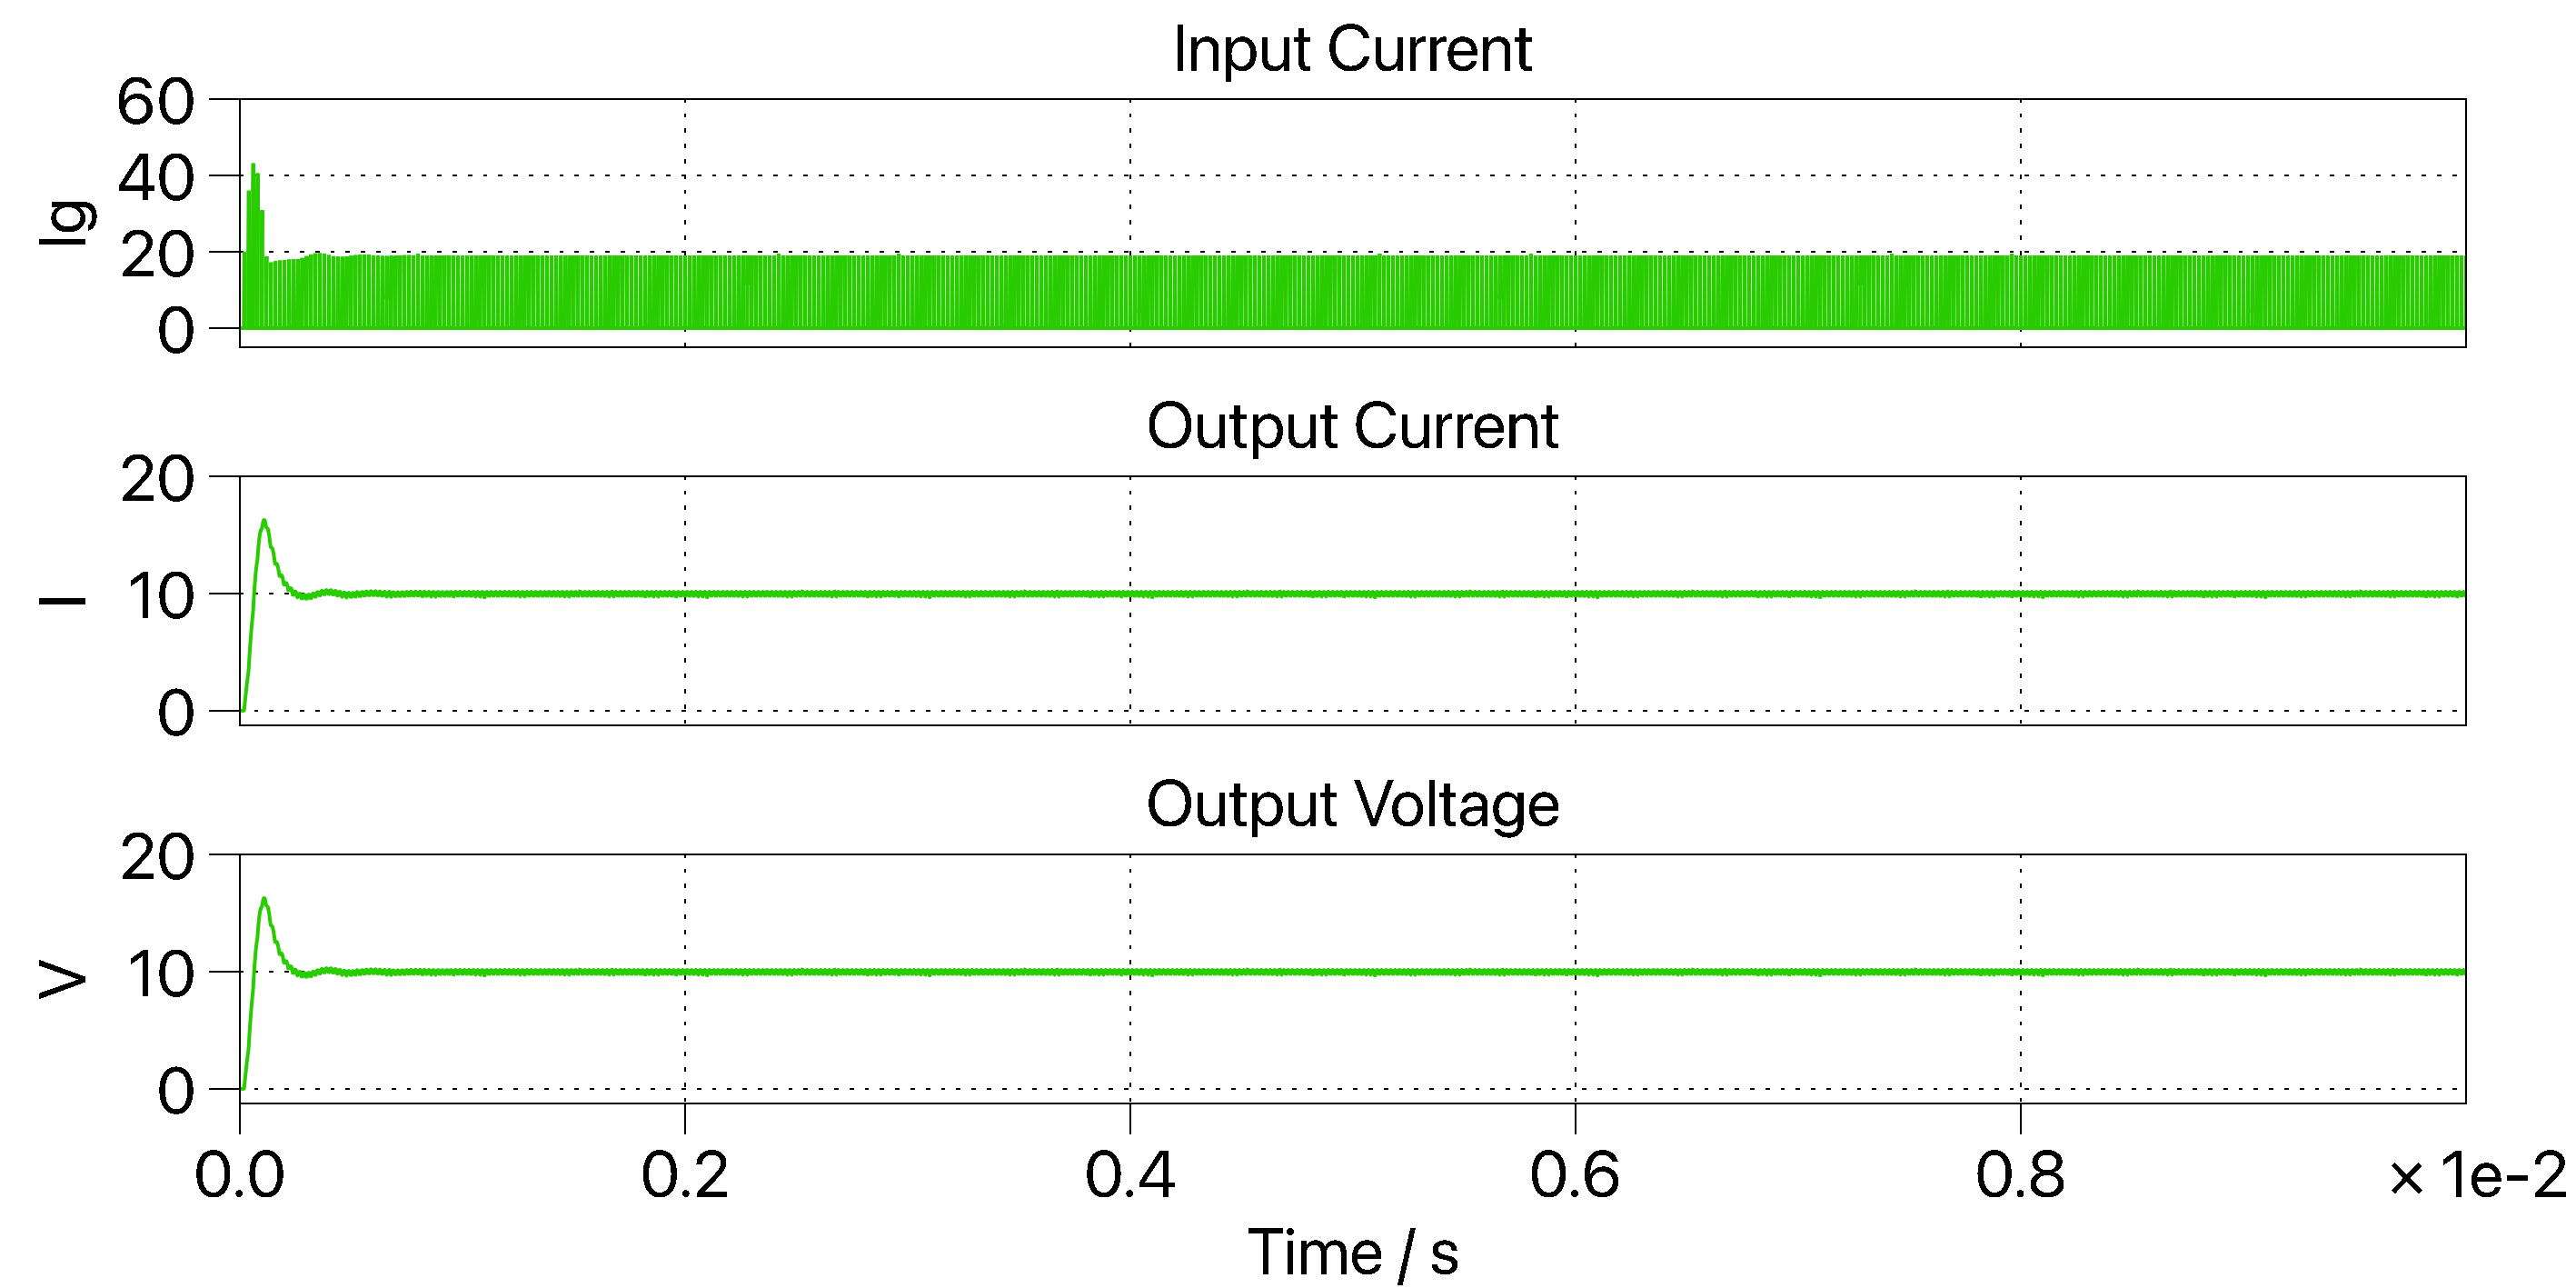
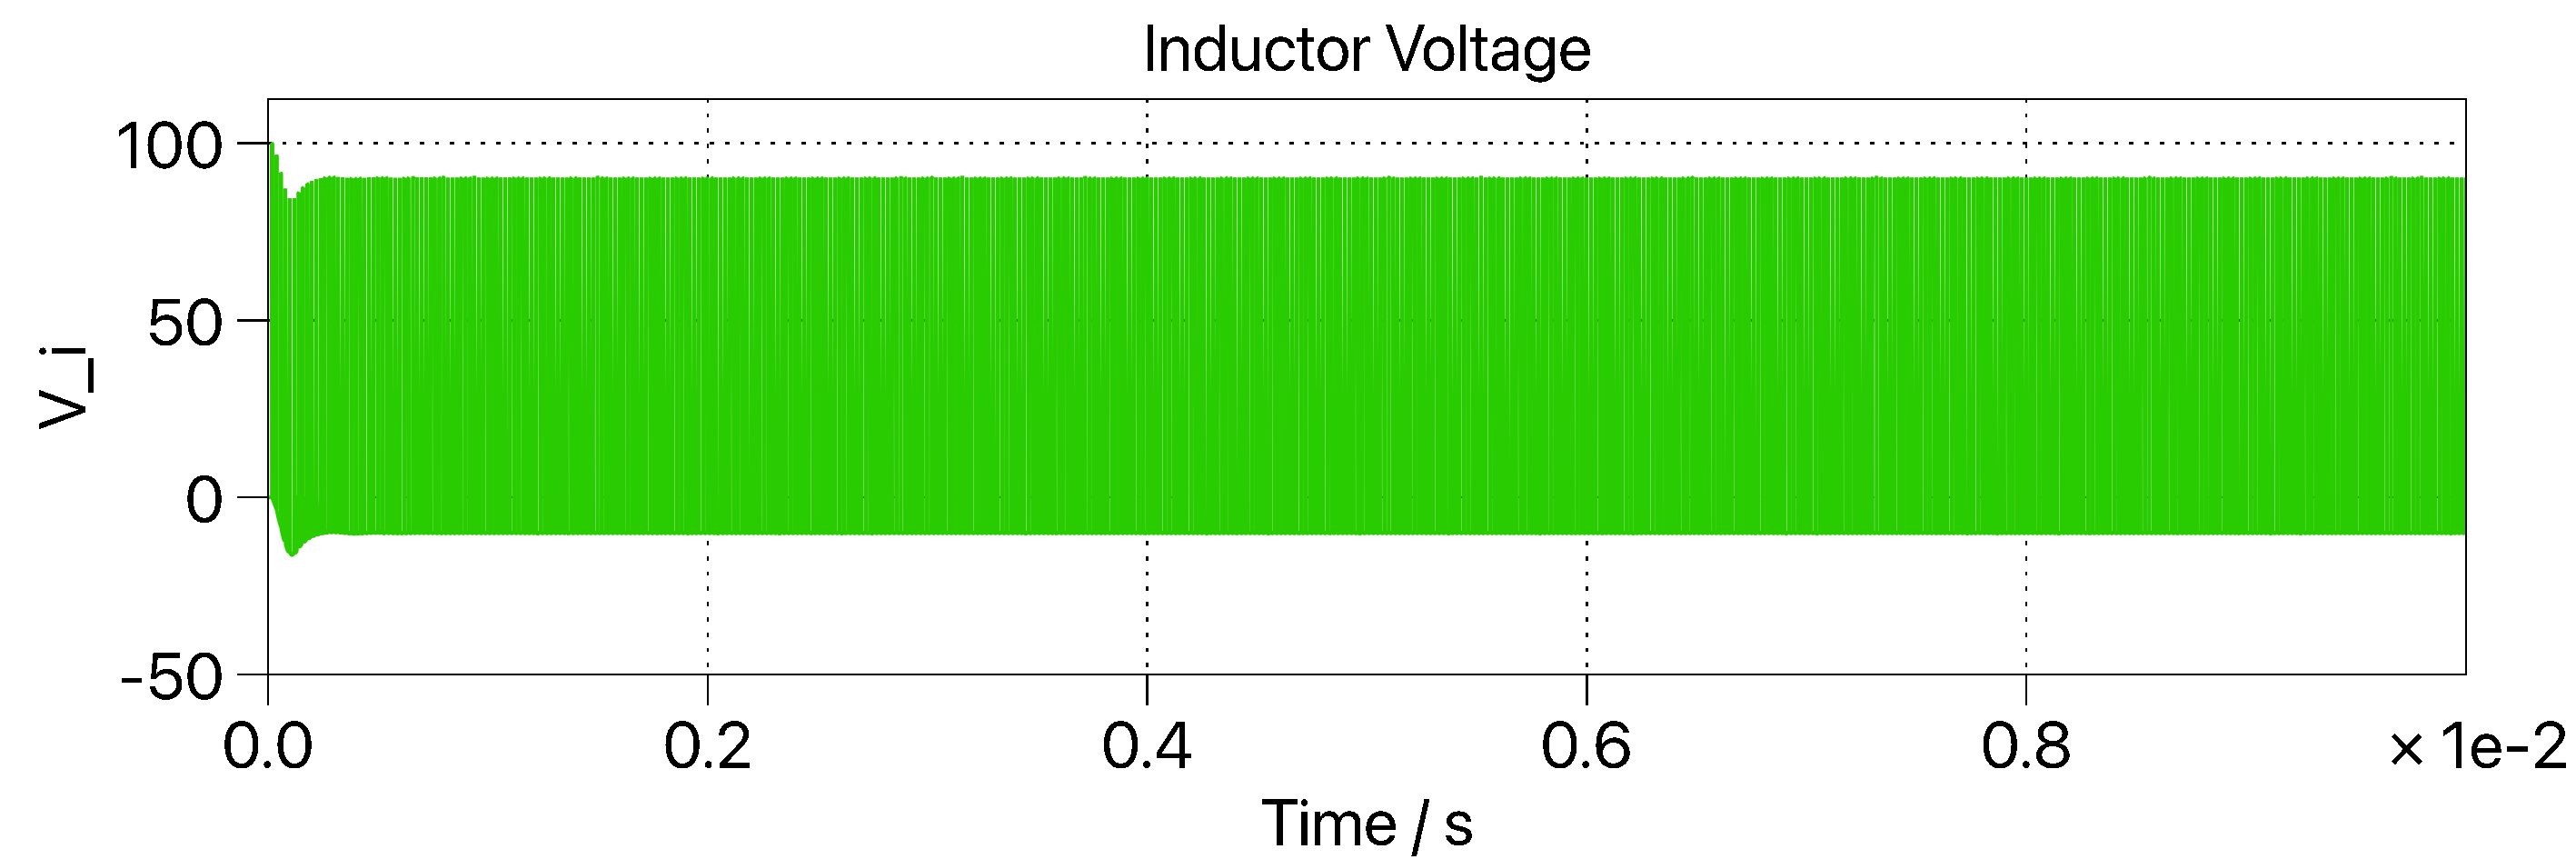

### Draw the below Boost converter circuit using a Type 2 switch cell.	
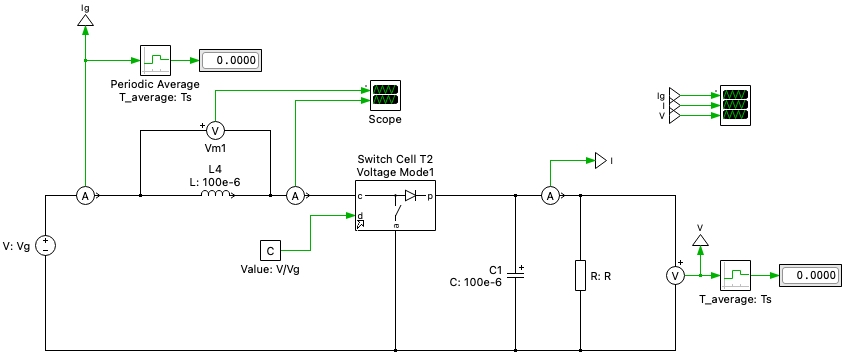
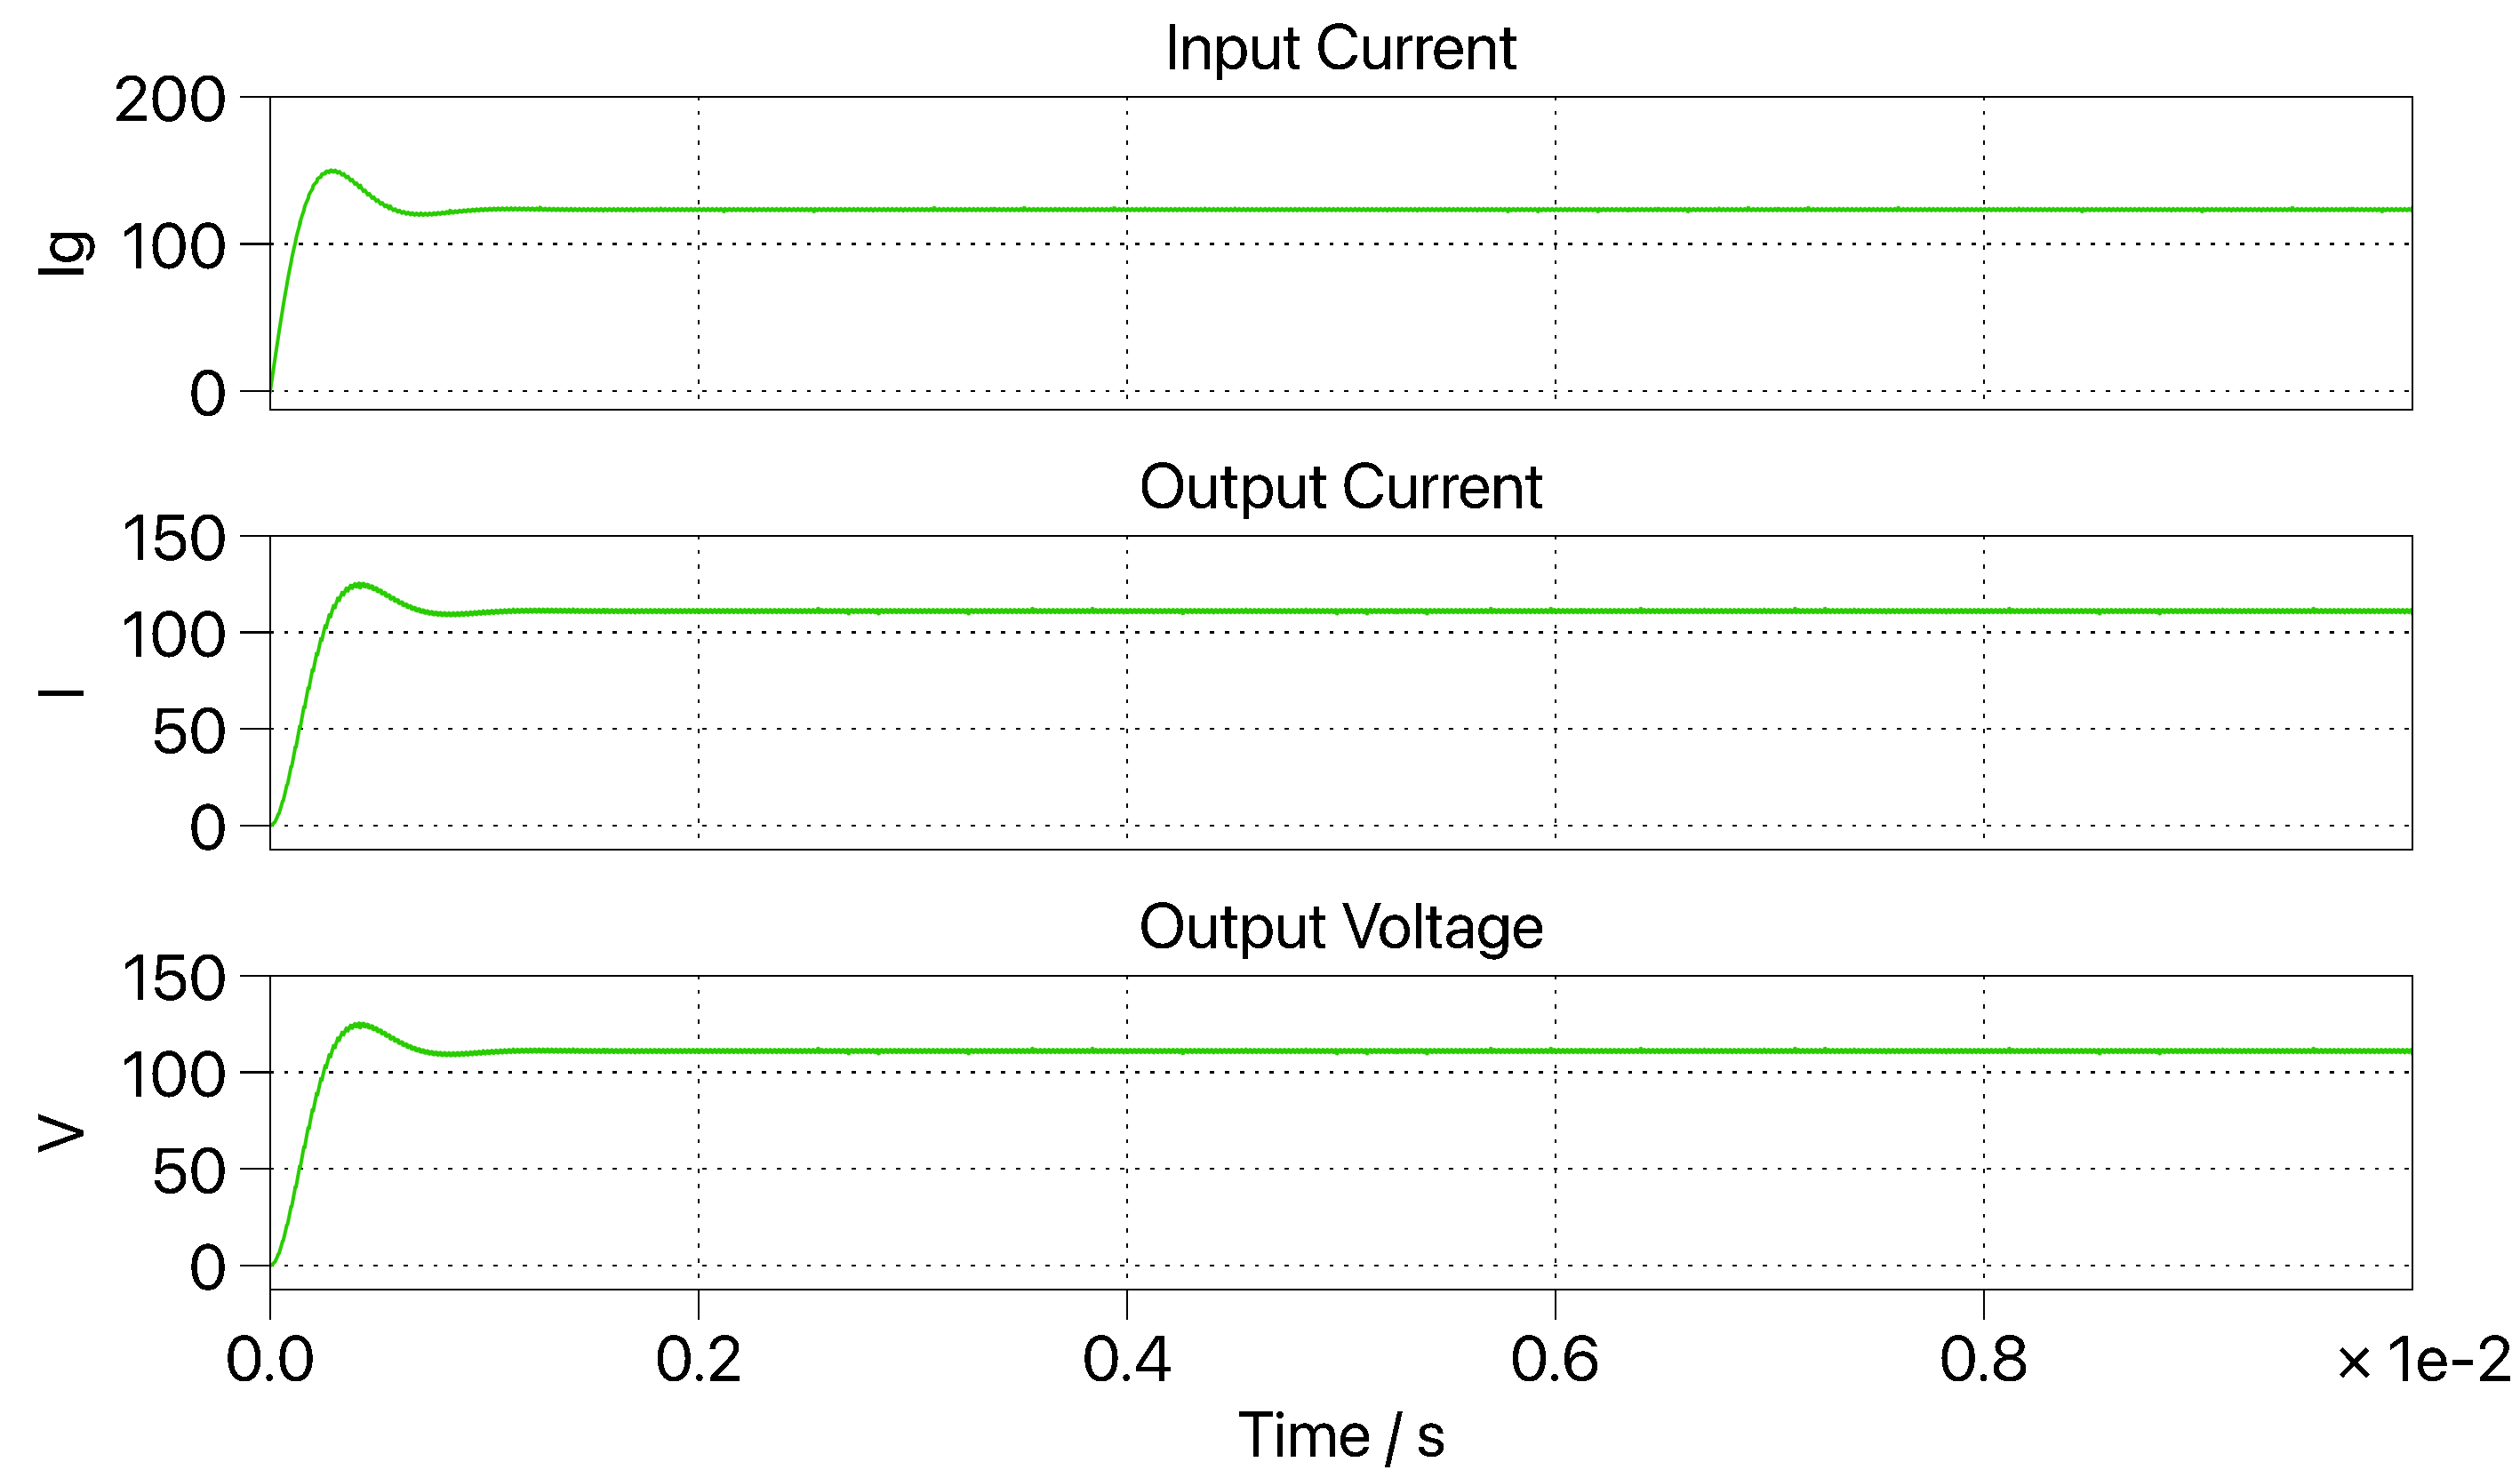
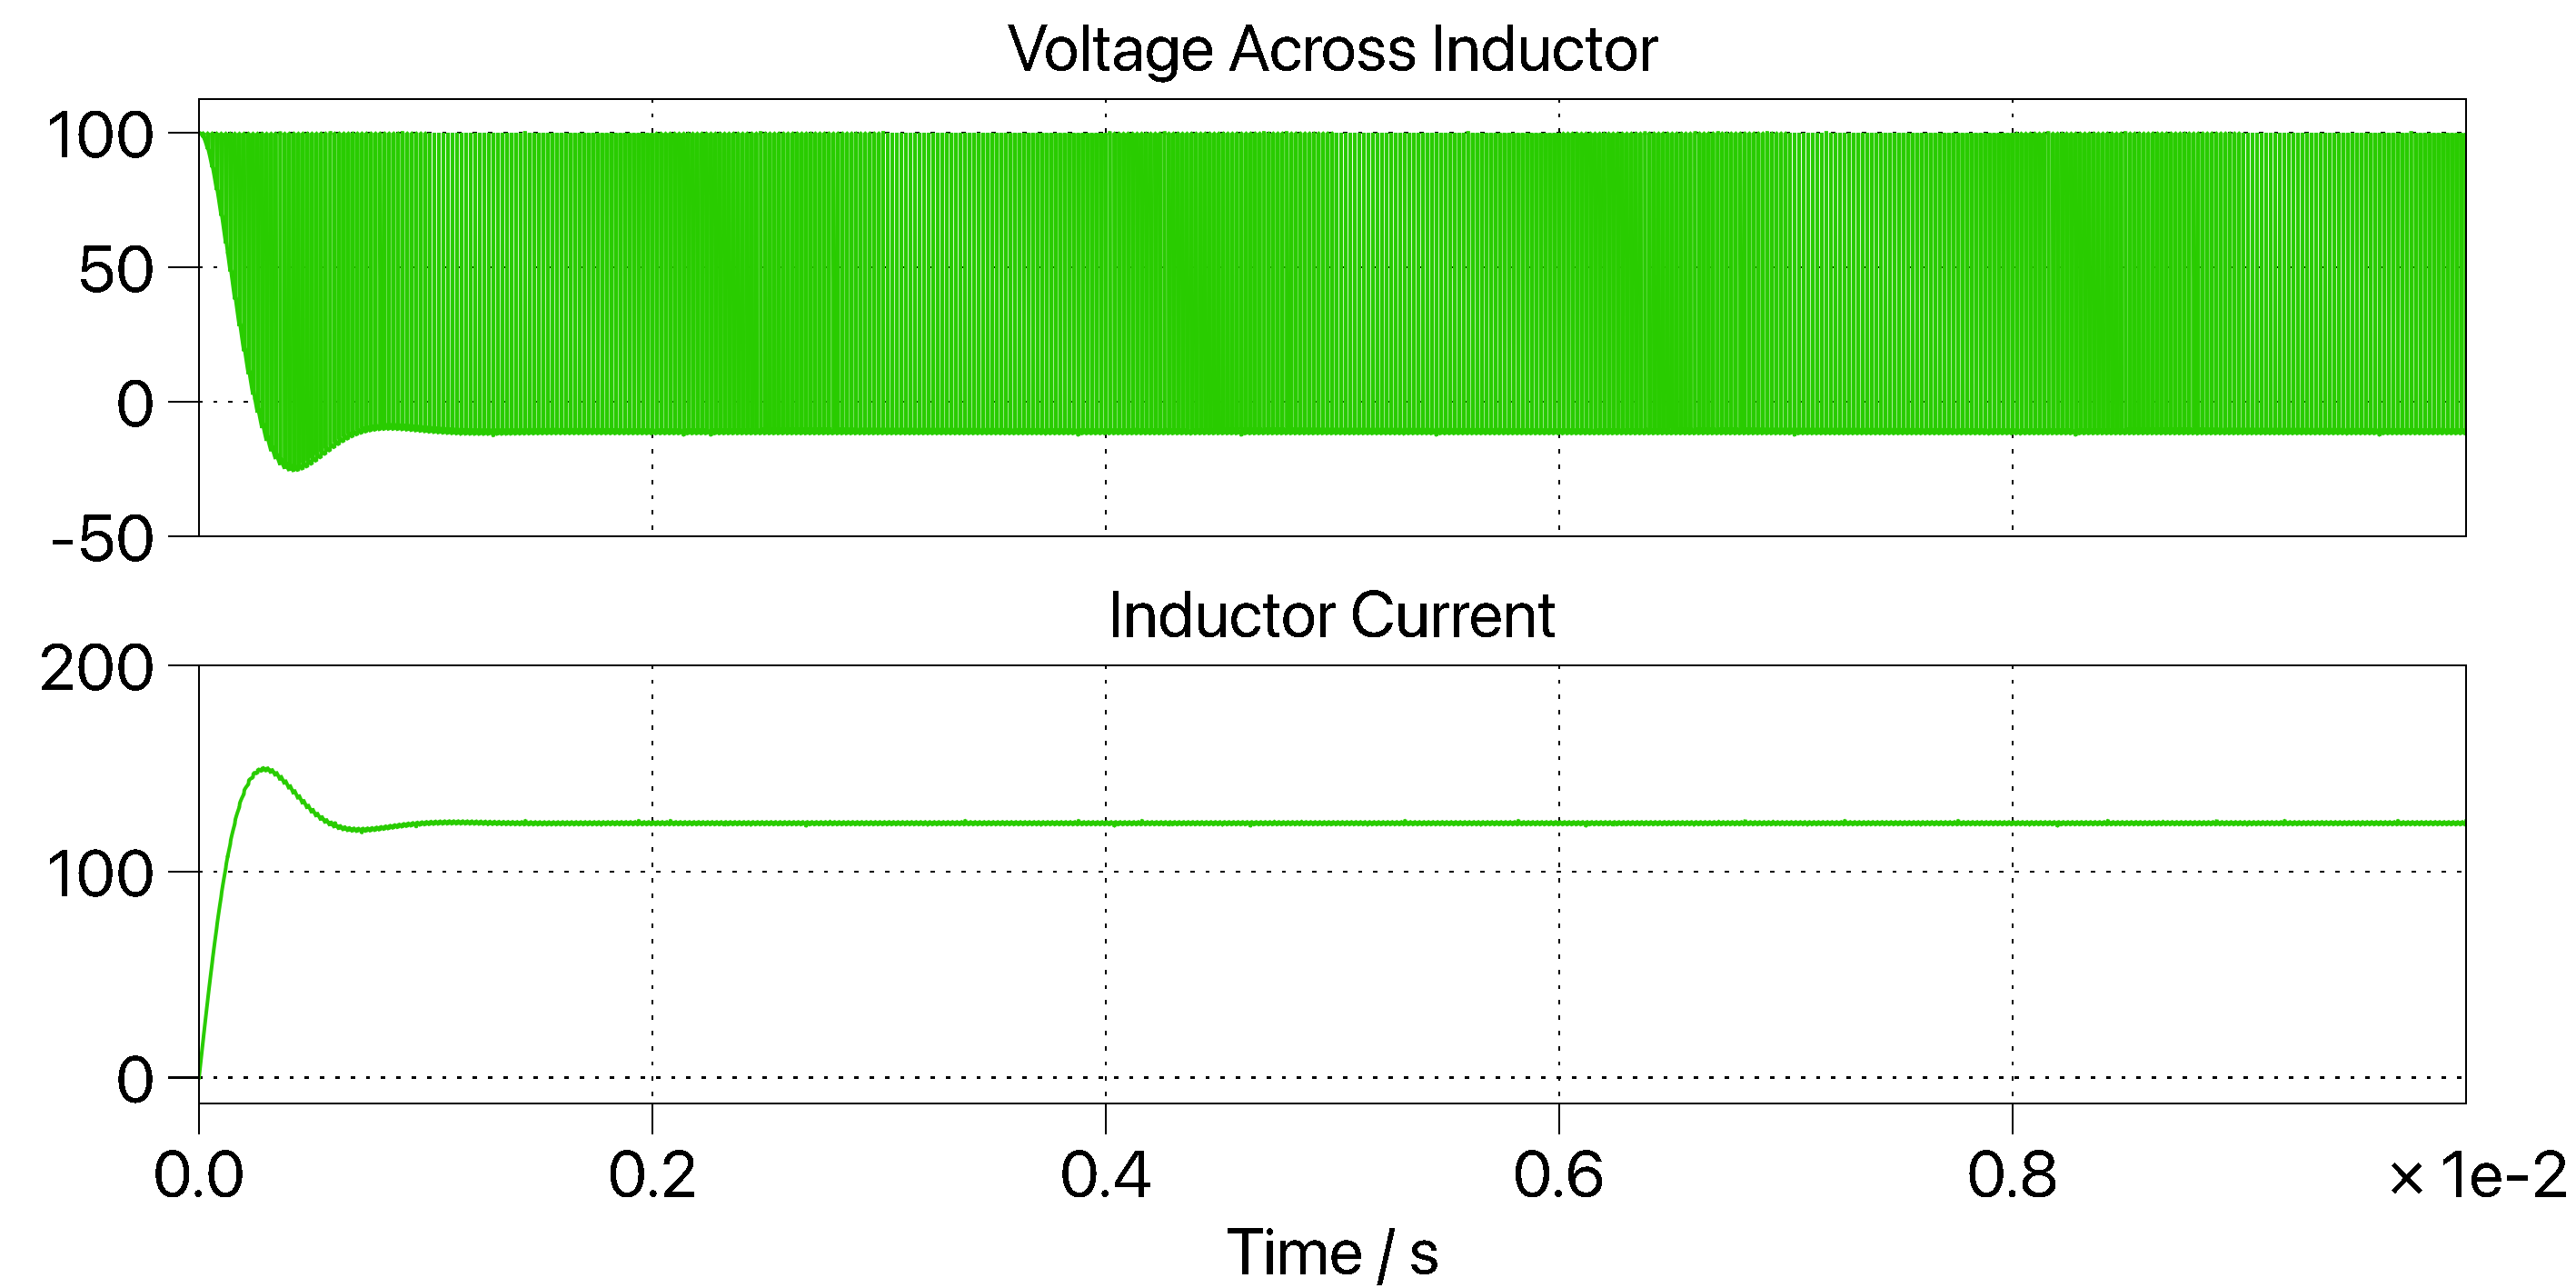
#### Q14: What are some of the fundamental differences compared to the Buck behavior and waveforms?
The boost converter pumps up the voltage to $\frac{V_{in}}{1-D}$ rather than down to $D*V_{in}$.

#### Q15: What is the voltage conversion ratio for D=50%?
The voltage conversion ratio for D=50%=0.5 is $\frac{1}{1-0.5}$, which evaluates to 2.

#### Q16: Plot the voltage conversion ratio M as a function of the duty cycle, for D=10% to 90% in 10% increments.	

The voltage conversion ratio for D=50%, marked in red, is further proven to be ~1.9939 or 2 through simulation, as you would expect from a boost converter.


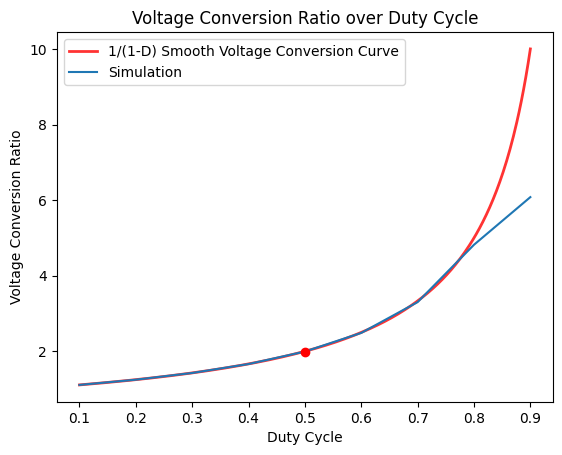

In [36]:
V_G = 100
D = np.divide(list(range(1, 10)), 10) # duty cycle
V = [
    111.0907, 124.9337, 142.7061, 
    166.3614, 199.3939, 248.7217, 
    330.1631, 481.9251, 607.9321
]

# Theoretical curve, modeled by 1/(1-D)
D_theory = np.linspace(0.1, 0.9, 400)
plt.plot(
    D_theory,
    1/(1 - D_theory),
    color='red',
    alpha=0.8,
    linewidth=2,
    label='1/(1-D) Smooth Voltage Conversion Curve'
)

plt.plot(D, np.divide(V,V_G), label="Simulation")
plt.plot(0.5, V[4]/V_G, 'ro')
print(
    "The voltage conversion ratio for D=50%, marked in red, " +
    f"is further proven to be ~{V[4]/V_G:.4f} or 2 through simulation, " + 
    "as you would expect from a boost converter."
)
plt.title("Voltage Conversion Ratio over Duty Cycle")
plt.xlabel("Duty Cycle")
plt.ylabel("Voltage Conversion Ratio")
plt.legend()

# Independent Step
1. I helped Allan understand why a switch cell looks like an ideal transformer.
2. I helped Allan figure out how to comment out circuit elements.
3. You made a small typo in Q16 -- it says "...function of a he duty cycle," instead of "function of the duty cycle"
5. To solidify my understanding of converter circuits, their voltage conversion ratios, and their relationship with first principles, I went through our textbook and read pages 13-22 on the buck converter circuits. This was primarily a review of the content covered in class but delivered through the textbook, but it helped me reinforce my knowledge, learn a little bit about buck-boost converters, and validate some of my lab findings. I attached the notes I took on the beginning of that chapter below.